# What is EDA

Exploratory Data Analysis (EDA) is a fundamental step which involves studying and exploring datasets to understand their main characteristics, discover patterns, spot anomalies, identify outliers, establish relationships between variables and validate assumptions using statistical results and mathematical visualisations. Here are the primary goals of EDA:


## Data Cleaning

EDA examines data for errors, missing values, and inconsistencies. Techniques like data imputation, handling missing data, and outlier detection are employed.



## Descriptive Statistics

EDA uses statistical measures (such as mean, median, standard deviation, range, and percentiles) to understand the central tendency, variability, and distribution of variables.


## Data Visualization

 Visual techniques (barcharts, pie charts,histograms, scatter plots, box plots, heatmaps, etc.) help identify trends, patterns, and relationships within the data.


## Correlation

EDA uncovers dependencies between variables using techniques like correlation analysis and scatter plots.

## Data Segmentation

Dividing data into meaningful segments based on specific criteria provides insights into subgroups.

## Hypothesis Generation

EDA generates research questions based on initial data exploration, forming the foundation for further analysis.

## Data Integrity

EDA assesses data quality, integrity, and accuracy to ensure suitability for analysis

# Olympics EDA Project Roadmap

Having a Roadmap helps us to be on track as there are greater possiblities where one may feel lost or exhausted. Lets sort out in points so we will have idea of how to proceed and complete our project.

1) Select a large real-world dataset

2) Analyze your Dataset and start data cleaning

3) Ask questions related to the topic and try to infer the answers from the dataset. (Note that this is an iterative process and you should keep updating your list as and when a question pops up in your head)

4) Perform a data analysis using Matplotlib, Seaborn.

5) Summarise your inference and write a conclusion

6) Document, publish and present the Jupyter notebook online

# About Dataset

Here we use three datasets:
    
    Summer Olympics Data(1896-2012)
    Winter Olympics Data(1924-2014)
    dictionary dataset - Contains the Population and GDP per capita information of each Country   all over the World
 Summer and Winterr Dataset altogether has 36935 instances ie.,36935 Rows * 9 Columns. 
Each instance corresponds to an individual athlete competing in an individual Olympic event (athlete-events). While the attribute consists of various inputs as follows ;

YEAR       - Year of Olympic games

CITY       - City of Olympian

SPORT      - Sport in which the Olympian Participated

DISCIPLINE - Discipline of Sport

ATHLETE    - Olympian Name

COUNTRY    - Country of the Olympian

GENDER     - Male/Female

EVENT      - Event Name

MEDAL      - Gold,Silver,Bronze


This dataset is a part of The Complete Pandas Bootcamp 2024: Data Science with Python
by Alexander Hagmann
https://www.udemy.com/course/the-pandas-bootcamp/learn/lecture/23346822?start=60#overview


# Project Goals

Lets analyze the Quality of Data in Dataset as Step 1. This is the most important step as Data Integrity helps in analyzing the accuracy of the data beforehand of any prediction. If analyst works on faulty data, even if all the techniques he/she handled is up to the mark, whatever predictions made is of no use as it may be misleading the stakeholders or anyone who is seeking the help of analysis for major Business Decision.

Lets seek help from Wikipedia for official olympic medal list and compare it with our dataset.Our Goal should be to minimize the divergence between your aggregated Medal Tables and the official Medal Tables. If the absolute divergence score is 0, then it indicates that good data integity.

After Checking for Data Integrity, Lets proceed with Data Cleaning and Merging of Summer and Winter Olympics Dataset and analyze it in various aspects.

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Loading Data 

In [2]:
summer=pd.read_csv('summer.csv')
winter=pd.read_csv('winter.csv')
dic=pd.read_csv('dictionary.csv')
wiki_1996= pd.read_csv('wik_1996.csv') #wikipedia 1996 summer Olympics data
wiki_1976=pd.read_csv('wik_1976.csv') #wikipedia 1976 summer Olympics data

### Analyzing Data

In [3]:
summer.head()#displays first five rows

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
summer.tail()#displays last five rows

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


### Data Cleaning

In [5]:
summer['Athlete']=summer.Athlete.str.title()#Title casing the Athletes column

In [6]:
summer['Athlete']=summer['Athlete'].str.split(', ').str[::-1].str.join(' ')#changing the order of names as first name_last name

In [7]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver


In [8]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [9]:
winter['Athlete']=winter.Athlete.str.title()#Title casing the Athletes column

In [10]:
winter['Athlete']=winter['Athlete'].str.split(', ').str[::-1].str.join(' ')#changing the order of names as first name_last name

In [11]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,G. Berthet,FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,C. Mandrillon,FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,Maurice Mandrillon,FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,André Vandelle,FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,Adolf Aufdenblatten,SUI,Men,Military Patrol,Gold


In [12]:
summer.info()#analyses for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [13]:
summer.loc[summer.Country.isna()]#check for missing values in country

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,Besik Kudukhov,NaN,Men,Wf 60 KG,Silver


Missing values here indicates that the results are pending and for Besik Kudukhov, it is evident from google search that he is a Russian Wrestler. It is also significant that deleting three rows out of 30k rows doesnt alter the inferences and predictions of the EDA.

In [14]:
index=[31110]
summer.loc[index,'Country']='Russia'

In [15]:
summer.iloc[31110]#replaced the missing country value

Year                         2012
City                       London
Sport                   Wrestling
Discipline    Wrestling Freestyle
Athlete            Besik Kudukhov
Country                    Russia
Gender                        Men
Event                    Wf 60 KG
Medal                      Silver
Name: 31110, dtype: object

In [16]:
summer.dropna(axis=0,inplace=True)#drop the rows where country is missing

In [17]:
summer.loc[summer.Country.isna()]#rows with missing values are dropped.

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal


In [18]:
wiki_1976.head()

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,Soviet Union (URS),49,41,35,125
1,2,East Germany (GDR),40,25,25,90
2,3,United States (USA),34,35,25,94
3,4,West Germany (FRG),10,12,17,39
4,5,Japan (JPN),9,6,10,25


In [19]:
wiki_1996.head()

,Rank,Nation,Gold,Silver,Bronze,Total
0,1,United States (USA)*,44,32,25,101
1,2,Russia (RUS),26,21,16,63
2,3,Germany (GER),20,18,27,65
3,4,China (CHN),16,22,12,50
4,5,France (FRA),15,7,15,37


Analyzing the wiki_1996 and wiki_1976 dataframe, the Nation column can be cleaned to proceed with data integrity test.

In [20]:
#insert new column country. remove open and close parenthesis and * at end for some countries
wiki_1976["Country"]= wiki_1976.NOC.str.split("(", expand= True).iloc[:, 1].str.replace(")", "").str.replace("*", "")

In [21]:
#Drop unnecessary rows and change the range index to country
wiki_1976 = wiki_1976.drop(columns =["Rank", "NOC", "Total"]).set_index("Country")

In [22]:
wiki_1976.head()#Analyzing the df

,Gold,Silver,Bronze
Country,,,
URS,49,41,35
GDR,40,25,25
USA,34,35,25
FRG,10,12,17
JPN,9,6,10


In [23]:
wiki_1996["Country"] = wiki_1996.Nation.str.split("(", expand= True).iloc[:, 1].str.replace(")", "").str.replace("*", "")
wiki_1996 = wiki_1996.drop(columns =["Rank", "Nation", "Total"]).set_index("Country")

In [24]:
wiki_1996.head()

,Gold,Silver,Bronze
Country,,,
USA,44,32,25
RUS,26,21,16
GER,20,18,27
CHN,16,22,12
FRA,15,7,15


We need to determine for each row, whether the medal was awarded in a Men, Women or Team Event.
The default assumption: The values in the new column Event_Gender are the same as in the column Gender. Then, we need to identify Team Events.

In [25]:
summer["Event_Gender"] = summer.Gender#Creating a new column Event gender. 

To determine Team Events let us consider some criterias;
 1) Event Column that contains string 'Pairs'
 2) Event Column that contains string 'Mixed'
 3) Sport Column that contains sting 'Equestrian'
 4) Sport Column that contains string 'Sailing' and Year before 1988.
 5) The event Badminton has certain rows as mixed events for which indices are provided.
 
Based on this lets create conditions.

In [26]:
check_1=summer.Event.str.lower().str.contains('mixed')
check_2=summer.Event.str.lower().str.contains('pairs')
check_3=summer.Sport.str.lower().str.contains('equestrian')
check_4=((summer.Sport.str.lower().str.contains('sailing'))&(summer.Year<1988))

In [27]:
#incorporating the conditions to Event_gender column and changing it to X.  
summer.loc[check_1|check_2|check_3|check_4, "Event_Gender"] = "X"

In [28]:
Badm_Team_Events = [21773, 21782, 21776,21785, 21770, 21779,23703,23712,23706, 23715,23709,23700,25720,25729,25723,25732,25726,
              25717,27727,27736, 27730,27739,27724,27733, 29784, 29785,29786,29787,29788,29789]

In [29]:
#replacing badminton index that was given to X
summer.loc[Badm_Team_Events, "Event_Gender"] = "X"

In [30]:
#X here stands for Team events
summer.Event_Gender.value_counts()

Event_Gender
Men      21213
Women     8175
X         1774
Name: count, dtype: int64

Identify all unique Events and count the amount of medals in each Event. Lets create new column Event_Medals and group it by Year, sport, discipline, Event and Event_Gender to identify unique events and count number of medals.

In [31]:
summer["Event_Medals"]=summer.groupby(["Year", "Sport", "Discipline", "Event", "Event_Gender"]).Medal.transform("count")

In [32]:
summer.Event_Medals.value_counts().sort_index()

Event_Medals
1         5
2        54
3      9225
4      1688
5        50
       ... 
73       73
74       74
76       76
82       82
116     116
Name: count, Length: 66, dtype: int64

In [33]:
#When number of events = 5 or less it can be determined that is not a team event.
#It is based on the fact that a event can have one gold medal, one or two silver medals and one or two bronze medals.
summer.loc[summer.Event_Medals == 5]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Event_Gender,Event_Medals
1273,1908,London,Athletics,Athletics,Edward Blake Archibald,CAN,Men,Pole Vault,Bronze,Men,5
1274,1908,London,Athletics,Athletics,Charles Sherman Jacobs,USA,Men,Pole Vault,Bronze,Men,5
1275,1908,London,Athletics,Athletics,Bruno Söderström,SWE,Men,Pole Vault,Bronze,Men,5
1276,1908,London,Athletics,Athletics,Edward Tiffin Cooke,USA,Men,Pole Vault,Gold,Men,5
1277,1908,London,Athletics,Athletics,Alfred Carleten Gilbert,USA,Men,Pole Vault,Gold,Men,5
7770,1948,London,Gymnastics,Artistic G.,Janos Mogyorosi-Klencs,HUN,Men,Vault,Bronze,Men,5
7771,1948,London,Gymnastics,Artistic G.,Ferenc Pataki,HUN,Men,Vault,Bronze,Men,5
7772,1948,London,Gymnastics,Artistic G.,Leo Sotornik,TCH,Men,Vault,Bronze,Men,5
7773,1948,London,Gymnastics,Artistic G.,Paavo Johannes Aaltonen,FIN,Men,Vault,Gold,Men,5
7774,1948,London,Gymnastics,Artistic G.,Olavi Antero Rove,FIN,Men,Vault,Silver,Men,5


### Removing Duplicated Medals in Team Events 

In [34]:
#Creating new column Team and where number of medals > 5, we state it as Team event and viceversa.
summer['Team']=pd.Series(np.where(summer.Event_Medals>5,'Yes','No'))

In [35]:
summer.reset_index(inplace=True)
singles=summer.loc[summer.Team=='No'].copy()#creating a copy so that it doesnt alter the original df 
singles.shape

(11019, 13)

In [36]:
Team=summer.loc[summer.Team=='Yes'].copy()#creating a copy so that it doesnt alter the original df
Team.shape

(20140, 13)

In [37]:
#dropping duplicates
Team.drop_duplicates(subset=['Year','Sport','Discipline','Country','Event','Event_Gender','Medal'],inplace=True)

In [38]:
#after removal of duplicates the shape has reduced from (20140, 13) to (3701, 13).
Team.shape

(3701, 13)

In [39]:
summer_new=pd.concat([singles,Team])#creating new dataframe. 

In [40]:
summer_new.set_index('index',inplace=True)

In [41]:
summer_new.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Event_Gender,Event_Medals,Team
index,,,,,,,,,,,,
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Men,2,No
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Men,2,No
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Men,3,No
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Men,3,No
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Men,3,No


In [42]:
#creating a new df medal_tables by aggregating Year, Country and Medal to compare with wikipedia data
medal_tables=summer_new.groupby(['Year','Country','Medal']).Medal.count().unstack(fill_value=0)[['Gold','Silver','Bronze']]

In [43]:
medal_tables.head()

Medal         Gold  Silver  Bronze
Year Country                      
1896 AUS         2       0       0
     AUT         2       1       2
     DEN         1       2       3
     FRA         5       4       2
     GBR         2       3       2

### Comparison with Wikipedia data


Lets extract 1976 and 1996 data to separate column and sort it by medal count descending. Also we will make it as copy so that it doesnt alter the original dataframe.

In [44]:
medal_1976=medal_tables.loc[1976].sort_values(['Gold','Silver','Bronze'],ascending=False).copy()

In [45]:
medal_1976.head()

Medal,Gold,Silver,Bronze
Country,,,
URS,49,41,35
GDR,40,25,25
USA,34,35,25
FRG,10,12,17
JPN,9,6,10


In [46]:
medal_1996=medal_tables.loc[1996].sort_values(['Gold','Silver','Bronze'],ascending=False).copy()
medal_1996.head()

Medal,Gold,Silver,Bronze
Country,,,
USA,44,32,25
RUS,26,21,16
GER,20,18,27
CHN,16,22,12
FRA,15,7,15


In [47]:
wiki_1996.head()

,Gold,Silver,Bronze
Country,,,
USA,44,32,25
RUS,26,21,16
GER,20,18,27
CHN,16,22,12
FRA,15,7,15


In [48]:
wiki_1976.head()

,Gold,Silver,Bronze
Country,,,
URS,49,41,35
GDR,40,25,25
USA,34,35,25
FRG,10,12,17
JPN,9,6,10


In [49]:
divergence_76=medal_1976.sub(wiki_1976).abs().dropna()
divergence_76.head()

Medal,Gold,Silver,Bronze
Country,,,
AUS,0.0,0.0,0.0
AUT,0.0,0.0,0.0
BEL,0.0,0.0,0.0
BER,0.0,0.0,0.0
BRA,0.0,0.0,0.0


In [50]:
score_76=divergence_76.sum().sum()
score_76

0.0

In [51]:
divergence_96=medal_1996.sub(wiki_1996).abs().dropna()
divergence_96.head()

Medal,Gold,Silver,Bronze
Country,,,
ALG,0.0,0.0,0.0
ARG,0.0,0.0,0.0
ARM,0.0,0.0,0.0
AUS,0.0,0.0,0.0
AUT,0.0,0.0,0.0


In [52]:
score_96=divergence_96.sum().sum()
score_96

0.0

Here we have reached the optimal score of 0 for absolute divergence on comparing the sample data from 1996 and 1976. This concludes that the data has good accuracy or integrity. Lets proceed with further analysis of data. 

## Merging Dataframe

--Merging Summer and Winter and save the merged DataFrame in new dataframe olympics.

--An additional column (e.g. "Edition") shall indicate the Edition whether it is Summer or Winter.

--Add the full Country name from dictionary dataframe to olympics (e.g. United States for USA).

In [53]:
#concatenating summer and winter dataframe and a new column Edition is created indicating whether it is summer or winter
pd.concat([summer, winter], axis = 0, keys = ["Summer", "Winter"],
          names = ["Edition"]).reset_index()

,Edition,level_1,index,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Event_Gender,Event_Medals,Team
0,Summer,0,0.0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Men,2.0,No
1,Summer,1,1.0,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Men,2.0,No
2,Summer,2,2.0,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Men,3.0,No
3,Summer,3,3.0,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Men,3.0,No
4,Summer,4,4.0,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Men,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36927,Winter,5765,NaN,2014,Sochi,Skiing,Snowboard,Jenny Jones,GBR,Women,Slopestyle,Bronze,NaN,NaN,NaN
36928,Winter,5766,NaN,2014,Sochi,Skiing,Snowboard,Jamie Anderson,USA,Women,Slopestyle,Gold,NaN,NaN,NaN
36929,Winter,5767,NaN,2014,Sochi,Skiing,Snowboard,Dominique Maltais,CAN,Women,Snowboard Cross,Silver,NaN,NaN,NaN
36930,Winter,5768,NaN,2014,Sochi,Skiing,Snowboard,Eva Samkova,CZE,Women,Snowboard Cross,Gold,NaN,NaN,NaN


In [54]:
#some columns are unnecessary, hence dropping it 
#creating a new df olympics and adding the concatenated dataframe to it
olympics = pd.concat([summer, winter], axis = 0, keys = ["Summer", "Winter"],
                     names = ["Edition"]).reset_index().drop(columns = ["level_1","index","Event_Gender","Event_Medals","Team"])

In [55]:
#merging olympics df and dic df
olympics=olympics.merge(dic.iloc[:,:2],how='left',left_on='Country',right_on='Code').drop(columns='Code')

In [56]:
olympics.reset_index(drop = True, inplace = True)
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y
0,Summer,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36927,Winter,2014,Sochi,Skiing,Snowboard,Jenny Jones,GBR,Women,Slopestyle,Bronze,United Kingdom
36928,Winter,2014,Sochi,Skiing,Snowboard,Jamie Anderson,USA,Women,Slopestyle,Gold,United States
36929,Winter,2014,Sochi,Skiing,Snowboard,Dominique Maltais,CAN,Women,Snowboard Cross,Silver,Canada
36930,Winter,2014,Sochi,Skiing,Snowboard,Eva Samkova,CZE,Women,Snowboard Cross,Gold,Czech Republic


In [57]:
#renaming the column names
olympics.rename(columns={'Country_x':'Code','Country_y':'Country'},inplace=True)

Remove Spaces from column headers in olympics and dictionary

In [58]:
dic.rename(columns = {"GDP per Capita":"GDP"}, inplace= True)

For some Country Codes, there is no corresponding full Country Name available in olympics. we will have to identify these Country Codes and search the Web for the full Country Names and replace missing values!

In [59]:
#identifying missing values
olympics.loc[olympics.Country.isnull()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,Edwin Flack,ZZX,Men,Doubles,Bronze,NaN
133,Summer,1896,Athens,Tennis,Tennis,George Stuart Robertson,ZZX,Men,Doubles,Bronze,NaN
134,Summer,1896,Athens,Tennis,Tennis,John Boland,ZZX,Men,Doubles,Gold,NaN
135,Summer,1896,Athens,Tennis,Tennis,Friedrich Traun,ZZX,Men,Doubles,Gold,NaN
136,Summer,1896,Athens,Tennis,Tennis,Dionysios Kasdaglis,ZZX,Men,Doubles,Silver,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33958,Winter,1992,Albertville,Skiing,Freestyle Skiing,Yelizaveta Kozhevnikova,EUN,Women,Moguls,Silver,NaN
33974,Winter,1992,Albertville,Skiing,Ski Jumping,Tomas Goder,TCH,Men,K120 Team (90M),Bronze,NaN
33975,Winter,1992,Albertville,Skiing,Ski Jumping,Frantisek Jez,TCH,Men,K120 Team (90M),Bronze,NaN
33976,Winter,1992,Albertville,Skiing,Ski Jumping,Jiri Parma,TCH,Men,K120 Team (90M),Bronze,NaN


In [60]:
# Lets create a list of indices where country values are missing
missing_C_index = olympics.loc[olympics.Country.isnull()].index
missing_C_index

Index([  132,   133,   134,   135,   136,   137,   257,   258,   259,   260,
       ...
       33936, 33944, 33946, 33950, 33951, 33958, 33974, 33975, 33976, 33977],
      dtype='int64', length=6364)

In [61]:
#Lets extract the code where country values is missing
old_c=olympics.loc[olympics.Country.isnull()].Code.value_counts().index
old_c

Index(['URS', 'GDR', 'ROU', 'FRG', 'TCH', 'YUG', 'EUN', 'EUA', 'ZZX', 'SRB',
       'ANZ', 'RU1', 'MNE', 'TTO', 'BOH', 'BWI', 'SGP', 'IOP', 'Russia'],
      dtype='object', name='Code')

In [62]:
#Create a series which consists of Country names of missing values
mapper=pd.Series(index=old_c,name = "Country", data = ["Soviet Union", "East Germany", "Romania", "West Germany", "Czechoslovakia",
                               "Yugoslavia", "Unified Team", "Unified Team of Germany", "Mixed teams", "Serbia",
                              "Australasia", "Russian Empire", "Montenegro", "Trinidad and Tobago", "Bohemia", 
                              "West Indies Federation", "Singapore", "Independent Olympic Participants","Russian Empire"])

In [63]:
#pairing up the missing index with country names with help of code
olympics.loc[missing_C_index,'Code'].map(mapper)

132         Mixed teams
133         Mixed teams
134         Mixed teams
135         Mixed teams
136         Mixed teams
              ...      
33958      Unified Team
33974    Czechoslovakia
33975    Czechoslovakia
33976    Czechoslovakia
33977    Czechoslovakia
Name: Code, Length: 6364, dtype: object

In [64]:
#filling Nan values with respective country values using map function
olympics.Country.fillna(olympics.Code.map(mapper), inplace=True)

In [65]:
#lets check for the missing_c_index rows  to see if the missing country values are filled
olympics.loc[missing_C_index]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,Edwin Flack,ZZX,Men,Doubles,Bronze,Mixed teams
133,Summer,1896,Athens,Tennis,Tennis,George Stuart Robertson,ZZX,Men,Doubles,Bronze,Mixed teams
134,Summer,1896,Athens,Tennis,Tennis,John Boland,ZZX,Men,Doubles,Gold,Mixed teams
135,Summer,1896,Athens,Tennis,Tennis,Friedrich Traun,ZZX,Men,Doubles,Gold,Mixed teams
136,Summer,1896,Athens,Tennis,Tennis,Dionysios Kasdaglis,ZZX,Men,Doubles,Silver,Mixed teams
...,...,...,...,...,...,...,...,...,...,...,...
33958,Winter,1992,Albertville,Skiing,Freestyle Skiing,Yelizaveta Kozhevnikova,EUN,Women,Moguls,Silver,Unified Team
33974,Winter,1992,Albertville,Skiing,Ski Jumping,Tomas Goder,TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33975,Winter,1992,Albertville,Skiing,Ski Jumping,Frantisek Jez,TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33976,Winter,1992,Albertville,Skiing,Ski Jumping,Jiri Parma,TCH,Men,K120 Team (90M),Bronze,Czechoslovakia


In [66]:
#analyzing the olympics dataframe for missing values
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36932 entries, 0 to 36931
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36932 non-null  object
 1   Year        36932 non-null  int64 
 2   City        36932 non-null  object
 3   Sport       36932 non-null  object
 4   Discipline  36932 non-null  object
 5   Athlete     36932 non-null  object
 6   Code        36932 non-null  object
 7   Gender      36932 non-null  object
 8   Event       36932 non-null  object
 9   Medal       36932 non-null  object
 10  Country     36932 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.1+ MB


In [67]:
#changing the datatype to category for minimum value counts, so that the memory usage can be reduced to certain extent
olympics.Medal=olympics.Medal.astype('category')
olympics.Gender=olympics.Gender.astype('category')
olympics.Edition=olympics.Edition.astype('category')

In [68]:
olympics.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36932 entries, 0 to 36931
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Edition     36932 non-null  category
 1   Year        36932 non-null  int64   
 2   City        36932 non-null  object  
 3   Sport       36932 non-null  object  
 4   Discipline  36932 non-null  object  
 5   Athlete     36932 non-null  object  
 6   Code        36932 non-null  object  
 7   Gender      36932 non-null  category
 8   Event       36932 non-null  object  
 9   Medal       36932 non-null  category
 10  Country     36932 non-null  object  
dtypes: category(3), int64(1), object(7)
memory usage: 2.4+ MB


There is a significant memory usage reduction from 3.1 mb to 2.4 mb after changing the datatype

In [69]:
#Convert the column Medal into an ordered Categorical column ("Bronze" < "Silver" < "Gold")
olympics.Medal.cat.set_categories(['Bronze','Silver','Gold'],ordered=True)

0          Gold
1        Silver
2        Bronze
3          Gold
4        Silver
          ...  
36927    Bronze
36928      Gold
36929    Silver
36930      Gold
36931    Bronze
Name: Medal, Length: 36932, dtype: category
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

# Exploratory Data Analysis and Visualization

Lets explore certain fields and make some inferences based on our Analysis;

Asking Analytical Questions is the most important step in EDA. In order to turn raw data into actionable insights. Answering relevant questions gives direction to every step in your data analysis process.

### Q.1 Top 10 successful countries in Olympics

In [70]:
top_10 = olympics.Country.value_counts().head(10)
top_10

Country
United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: count, dtype: int64

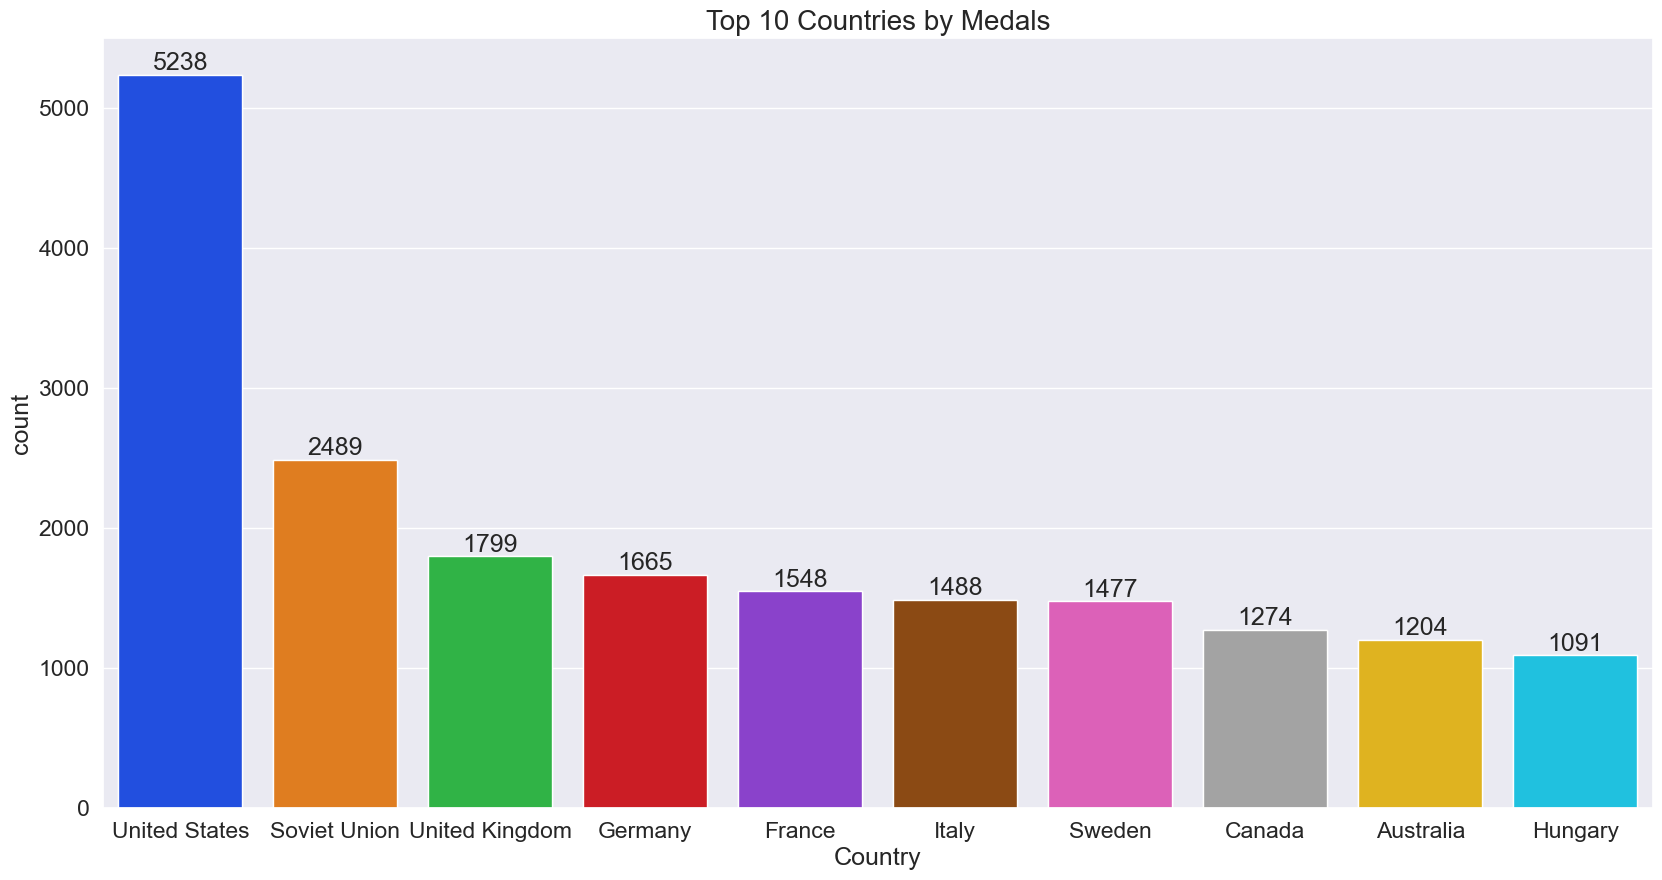

In [71]:
olympics_10=olympics[olympics.Country.isin(top_10.index)]
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
sns.countplot(data=olympics_10,x='Country',palette='bright',order=top_10.index)
ax=sns.countplot(data=olympics_10,x='Country',palette='bright',order=top_10.index)
plt.title('Top 10 Countries by Medals',fontsize=20)
ax.bar_label(ax.containers[0])#labelling barplot
plt.show()

### Q.2 Can you analyze the sports in which the Top 3 Countries concentrate most ?

Top 3 countries as per our analysis are:

1) United States
2) Soviet Union
3) United Kingdom

In [72]:
usa=olympics[olympics['Country']=='United States']
usa_top=usa.Sport.value_counts().head(15)

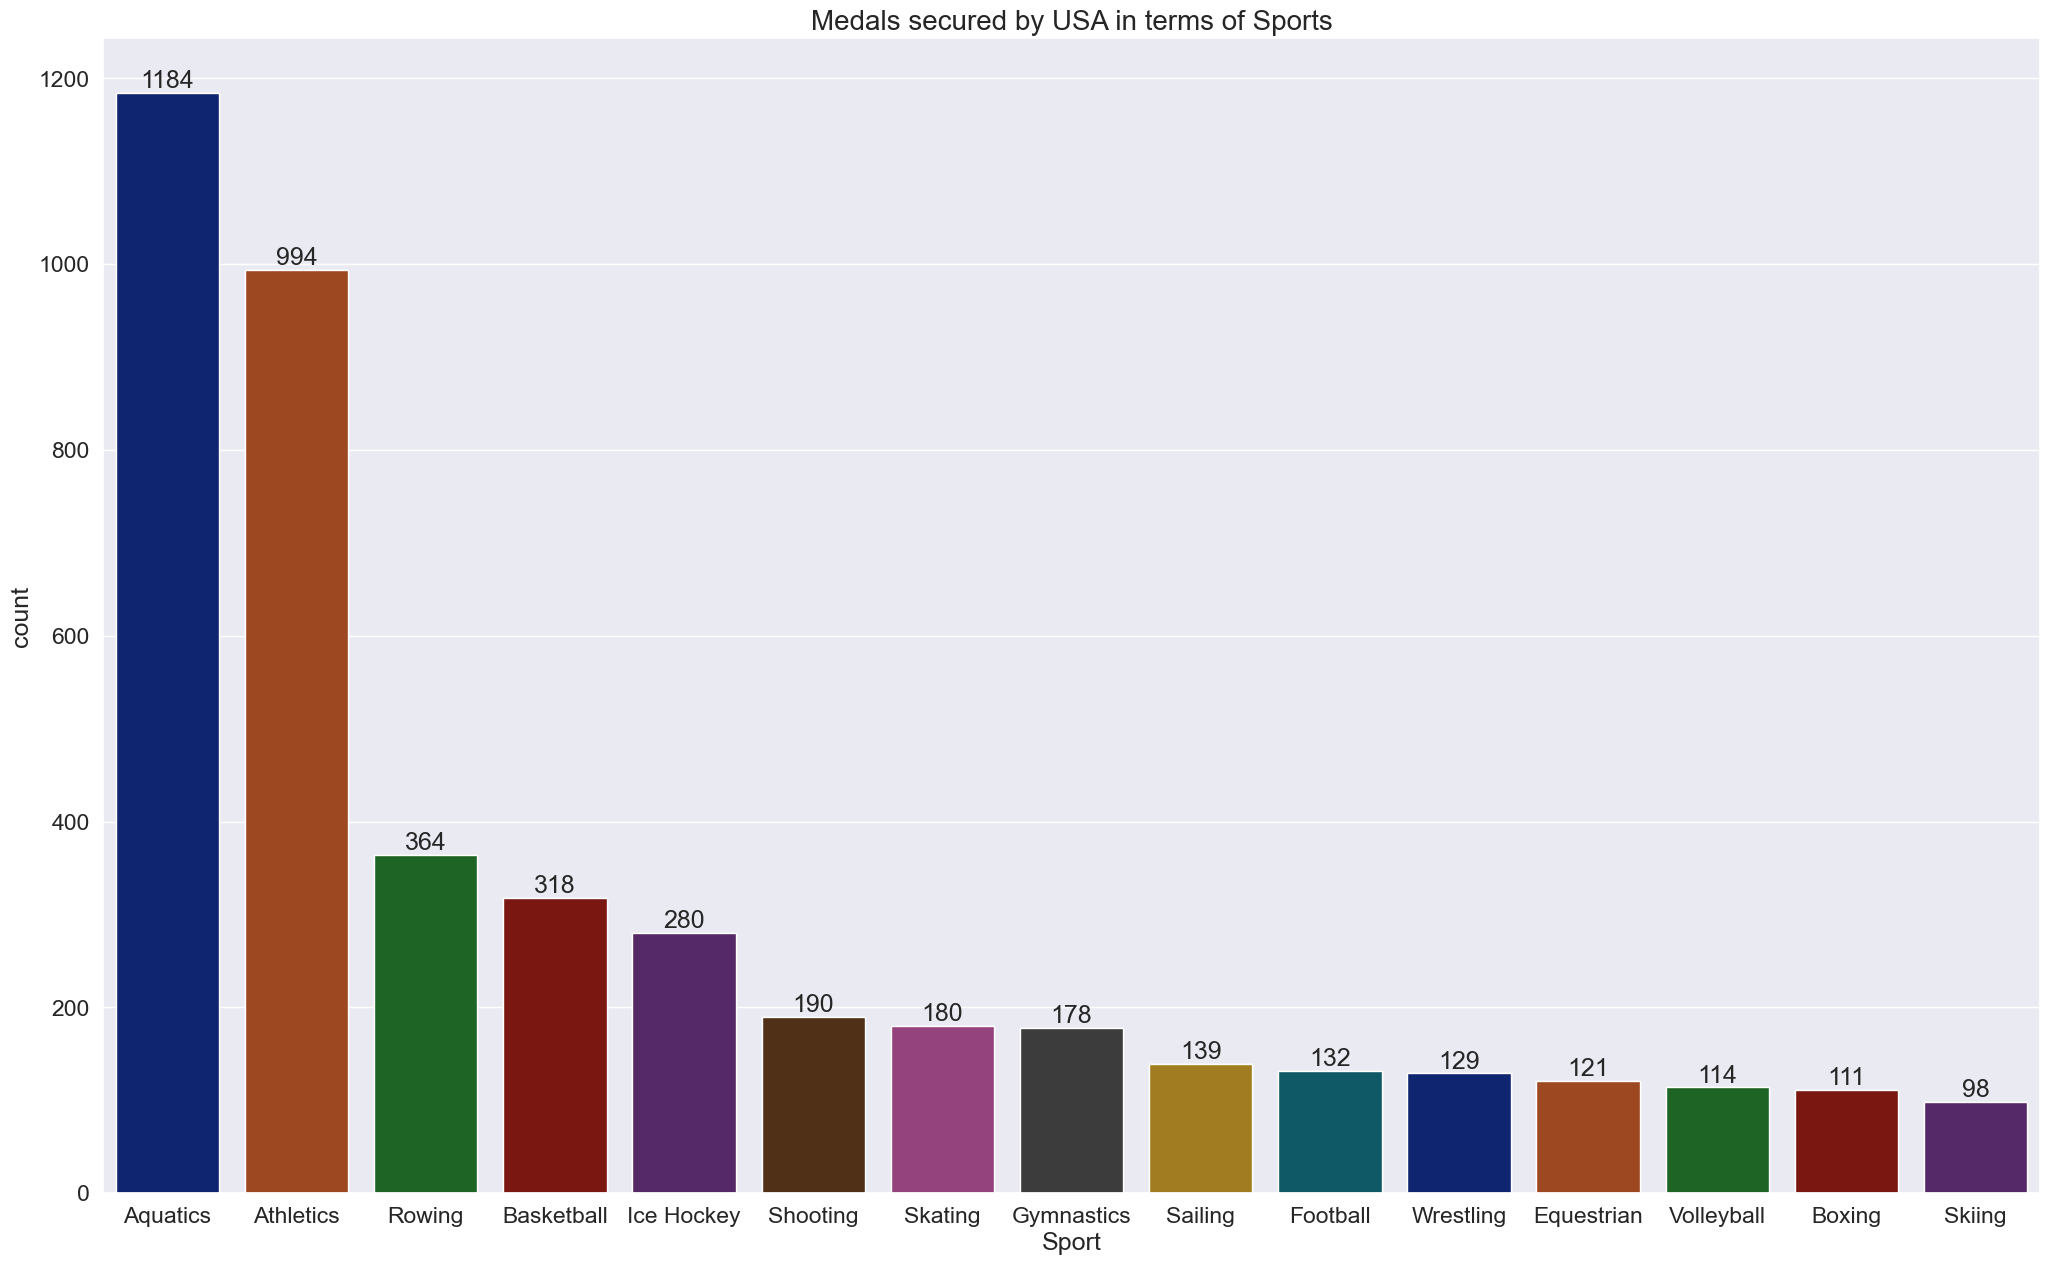

In [73]:
plt.figure(figsize=(25,15))
sns.set(font_scale=1.5)
sns.countplot(data=usa,x='Sport',palette='dark',order=usa_top.index)
ax=sns.countplot(data=usa,x='Sport',palette='dark',order=usa_top.index)
ax.bar_label(ax.containers[0])
plt.title('Medals secured by USA in terms of Sports',fontsize=20)
plt.show()

USA concentrates most in Aquatics and has secured 1184 medals it which is the Highest and 994 medals in Athletics which is next Highest and 364 medals in Rowing as third highest.

In [74]:
su=olympics[olympics['Country']=='Soviet Union']
su_top=su.Sport.value_counts().head(15)

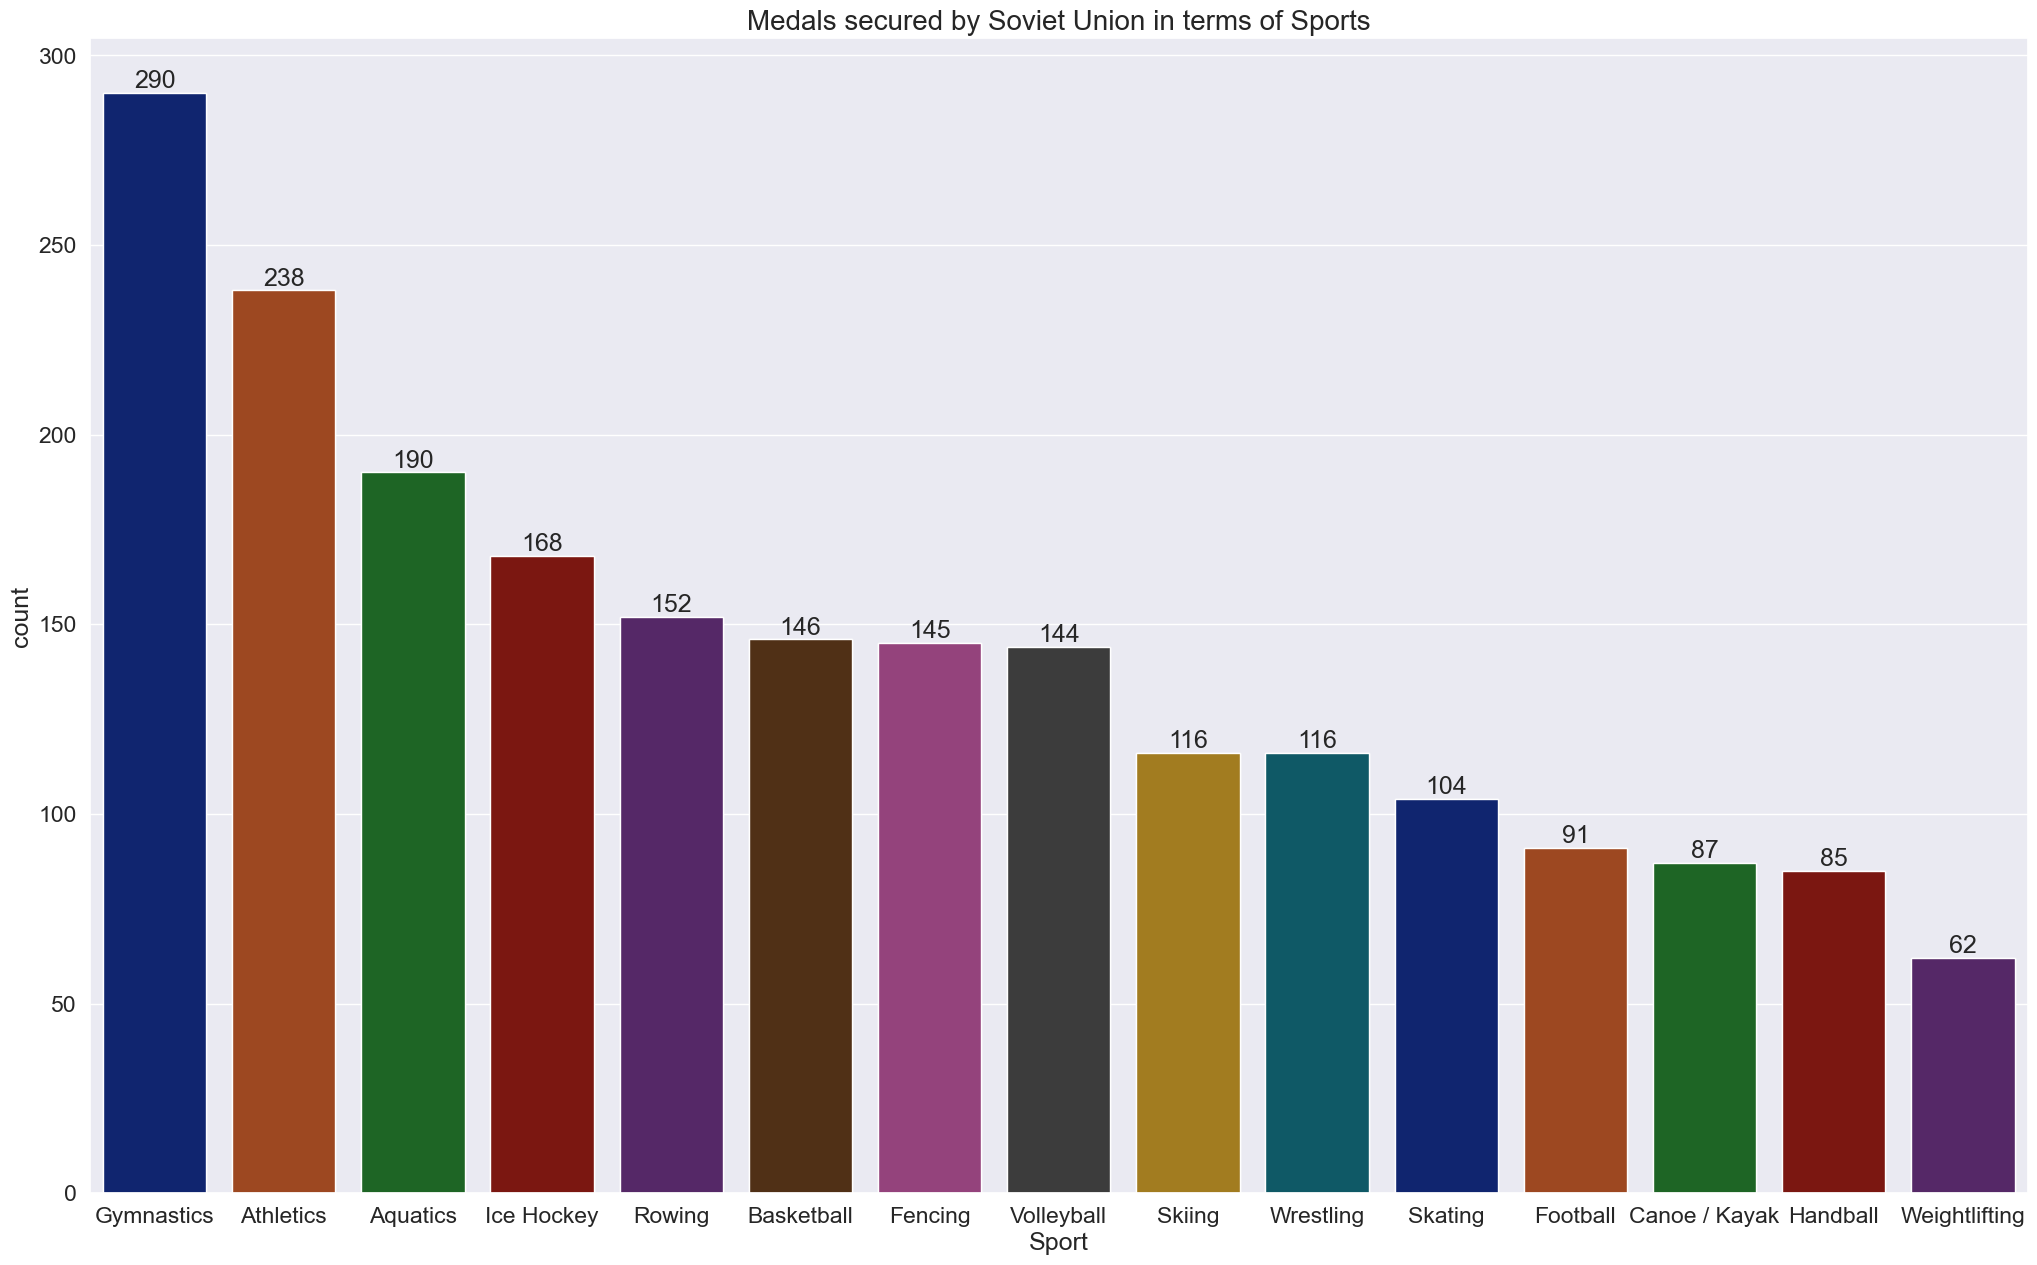

In [75]:
plt.figure(figsize=(25,15))
sns.set(font_scale=1.5)
sns.countplot(data=su,x='Sport',palette='dark',order=su_top.index)
ax=sns.countplot(data=su,x='Sport',palette='dark',order=su_top.index)
ax.bar_label(ax.containers[0])
plt.title('Medals secured by Soviet Union in terms of Sports',fontsize=20)
plt.show()

Soviet Union concentrates most in Gymnastics and has secured 290 medals it which is the Highest and 238 medals in Athletics which is next Highest and 190 medals in Aquatics as third highest.

In [76]:
uk=olympics[olympics['Country']=='United Kingdom']
uk_top=uk.Sport.value_counts().head(15)

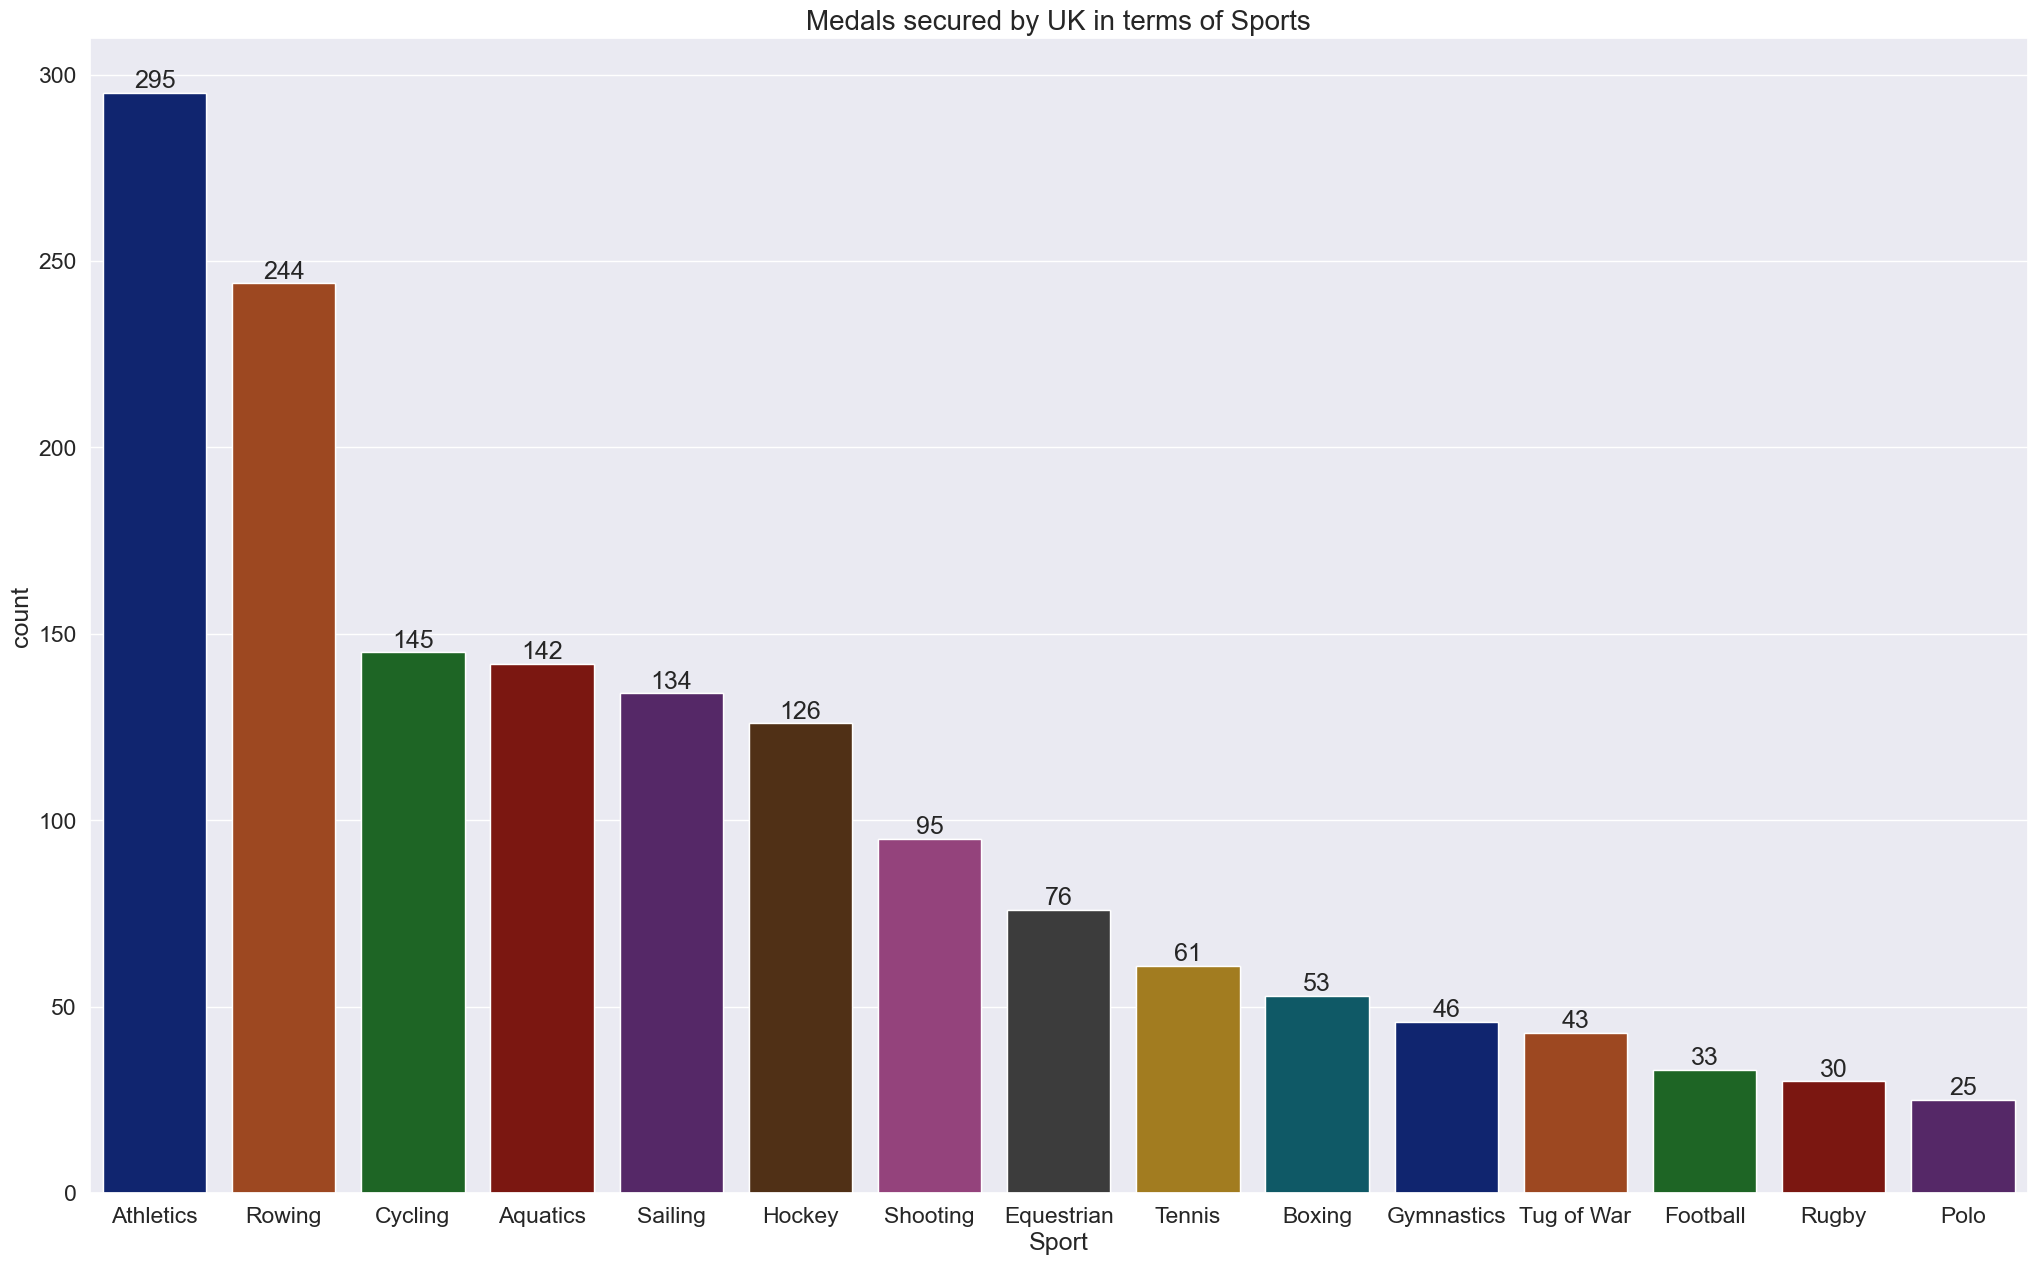

In [77]:
plt.figure(figsize=(25,15))
sns.set(font_scale=1.5)
sns.countplot(data=uk,x='Sport',palette='dark',order=uk_top.index)
ax=sns.countplot(data=uk,x='Sport',palette='dark',order=uk_top.index)
ax.bar_label(ax.containers[0])
plt.title('Medals secured by UK in terms of Sports',fontsize=20)
plt.show()

United Kingdom concentrates most in Athletics and has secured 295 medals it which is the Highest and 244 medals in Rowing which is next Highest and 145 medals in Cycling as third highest.

### Q.3 Analyze India's Medals on Olympics

In [78]:
india=olympics[olympics['Country']=='India']
india_top=india.Sport.value_counts().head(15)

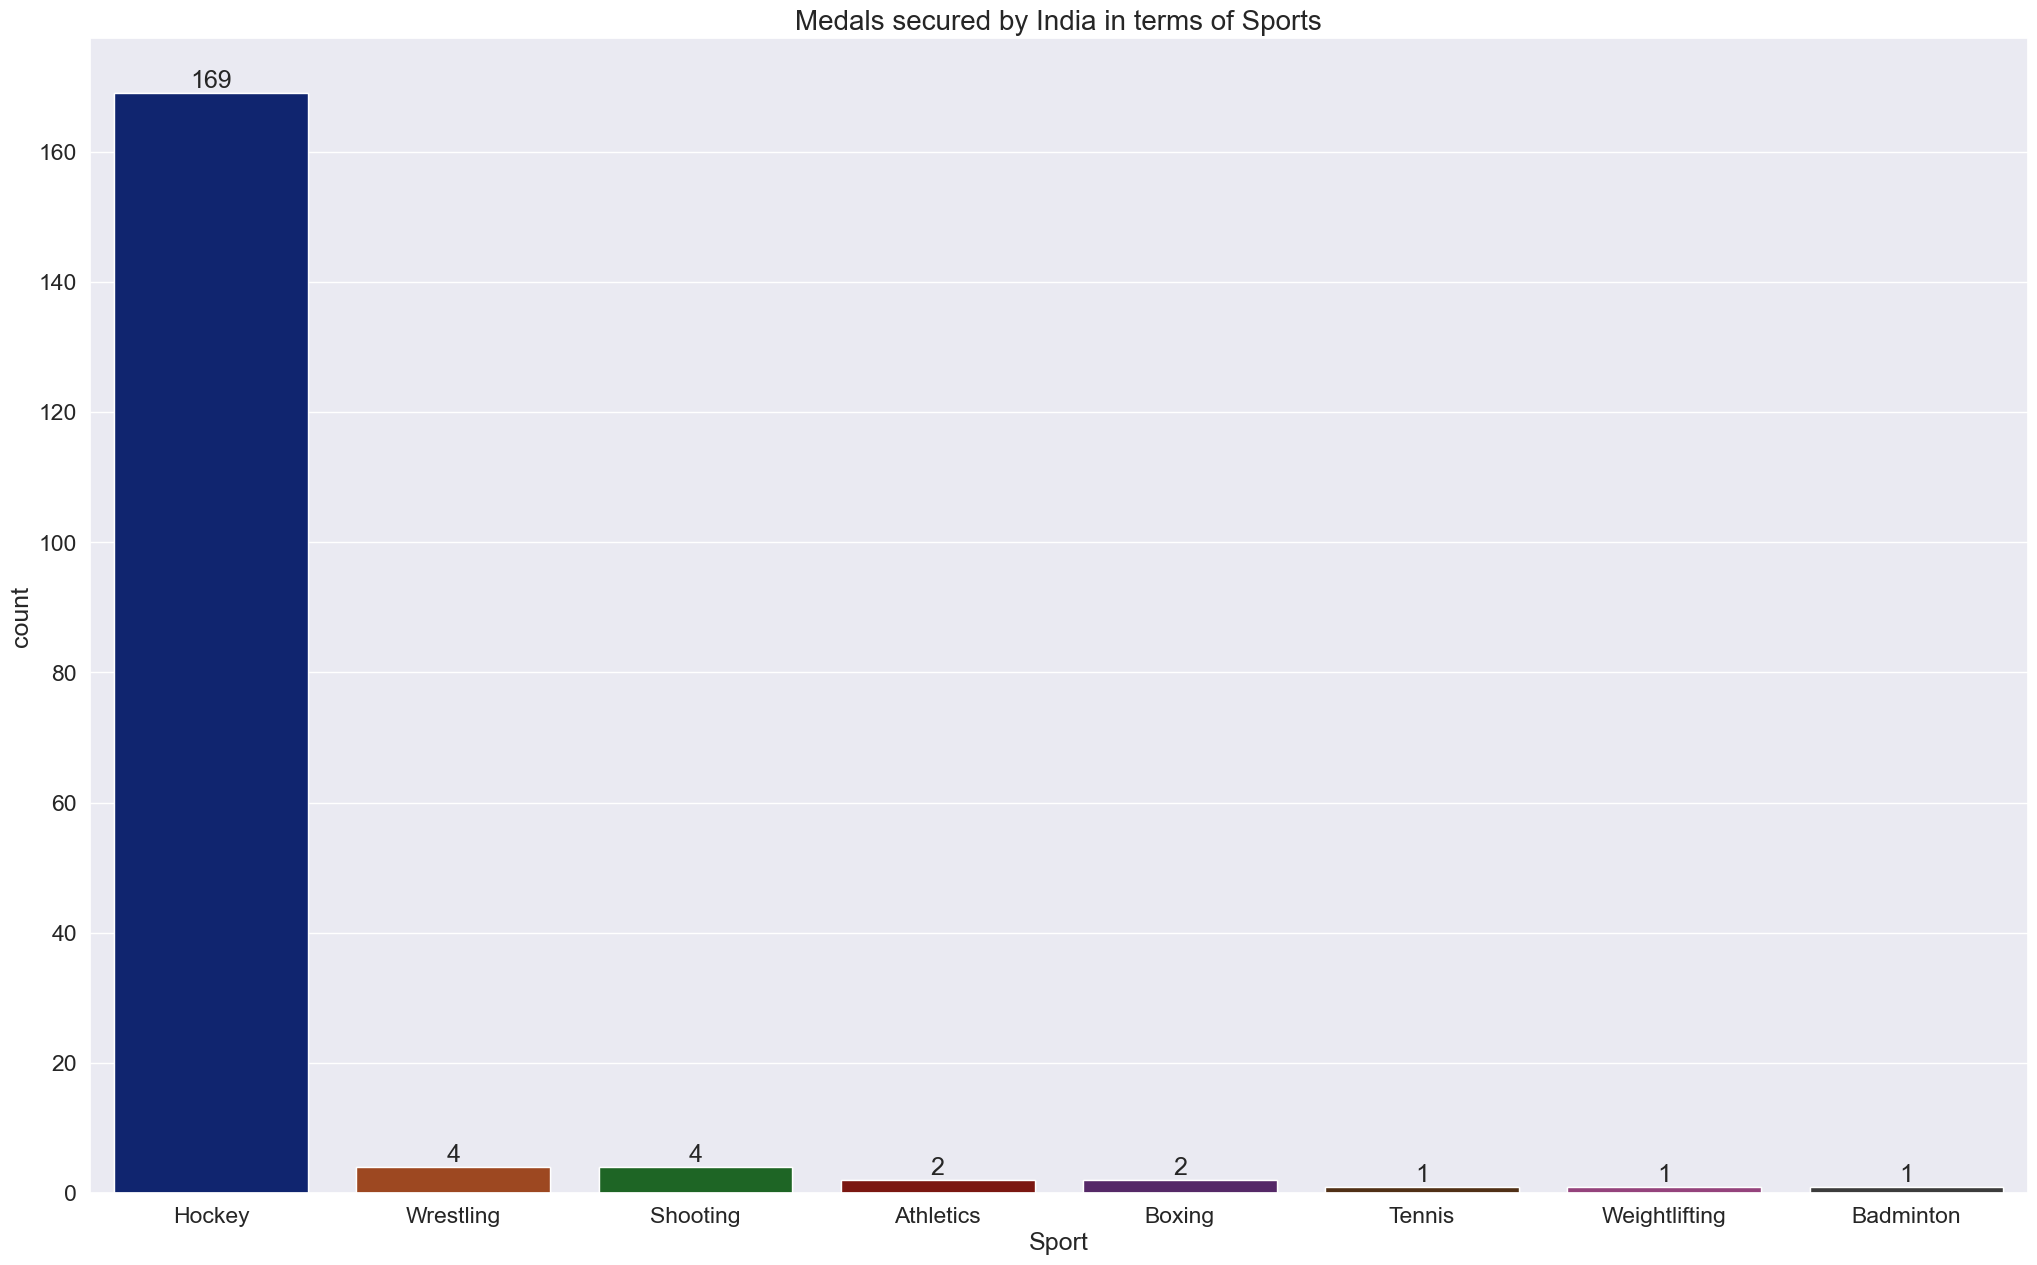

In [79]:
plt.figure(figsize=(25,15))
sns.set(font_scale=1.5)
sns.countplot(data=india,x='Sport',palette='dark',order=india_top.index)
ax=sns.countplot(data=india,x='Sport',palette='dark',order=india_top.index)
ax.bar_label(ax.containers[0])
plt.title('Medals secured by India in terms of Sports',fontsize=20)
plt.show()

In [80]:
india

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
241,Summer,1900,Paris,Athletics,Athletics,Norman Pritchard,IND,Men,200M,Silver,India
244,Summer,1900,Paris,Athletics,Athletics,Norman Pritchard,IND,Men,200M Hurdles,Silver,India
5512,Summer,1928,Amsterdam,Hockey,Hockey,Richard James Allen,IND,Men,Hockey,Gold,India
5513,Summer,1928,Amsterdam,Hockey,Hockey,Dyan Chand,IND,Men,Hockey,Gold,India
5514,Summer,1928,Amsterdam,Hockey,Hockey,Maurice A. Gateley,IND,Men,Hockey,Gold,India
...,...,...,...,...,...,...,...,...,...,...,...
29878,Summer,2012,London,Boxing,Boxing,Mary Kom,IND,Women,51 KG,Bronze,India
30840,Summer,2012,London,Shooting,Shooting,Gagan Narang,IND,Men,10M Air Rifle,Bronze,India
30848,Summer,2012,London,Shooting,Shooting,Vijay Kumar,IND,Men,25M Rapid Pistol,Silver,India
31108,Summer,2012,London,Wrestling,Wrestling Freestyle,Yogeshwar Dutt,IND,Men,Wf 60 KG,Bronze,India


India has secured a total of 184 medals in total and most of the medals are from Hockey ie., 91.8%.

### Q.4 Which is the most played games in Olympics?

In [82]:
sport=olympics.Sport.value_counts()
sport

Sport
Aquatics             4170
Athletics            3637
Rowing               2667
Gymnastics           2307
Skiing               1781
Fencing              1613
Ice Hockey           1563
Football             1497
Hockey               1422
Skating              1256
Wrestling            1212
Shooting             1150
Sailing              1109
Cycling              1105
Basketball           1012
Canoe / Kayak        1002
Volleyball            994
Handball              973
Equestrian            939
Boxing                894
Weightlifting         591
Judo                  491
Bobsleigh             452
Biathlon              420
Baseball              335
Archery               329
Tennis                296
Rugby                 192
Softball              180
Luge                  180
Modern Pentathlon     180
Curling               172
Badminton             144
Table Tennis          144
Taekwondo             112
Tug of War             94
Canoe                  81
Polo                   66
Lacros

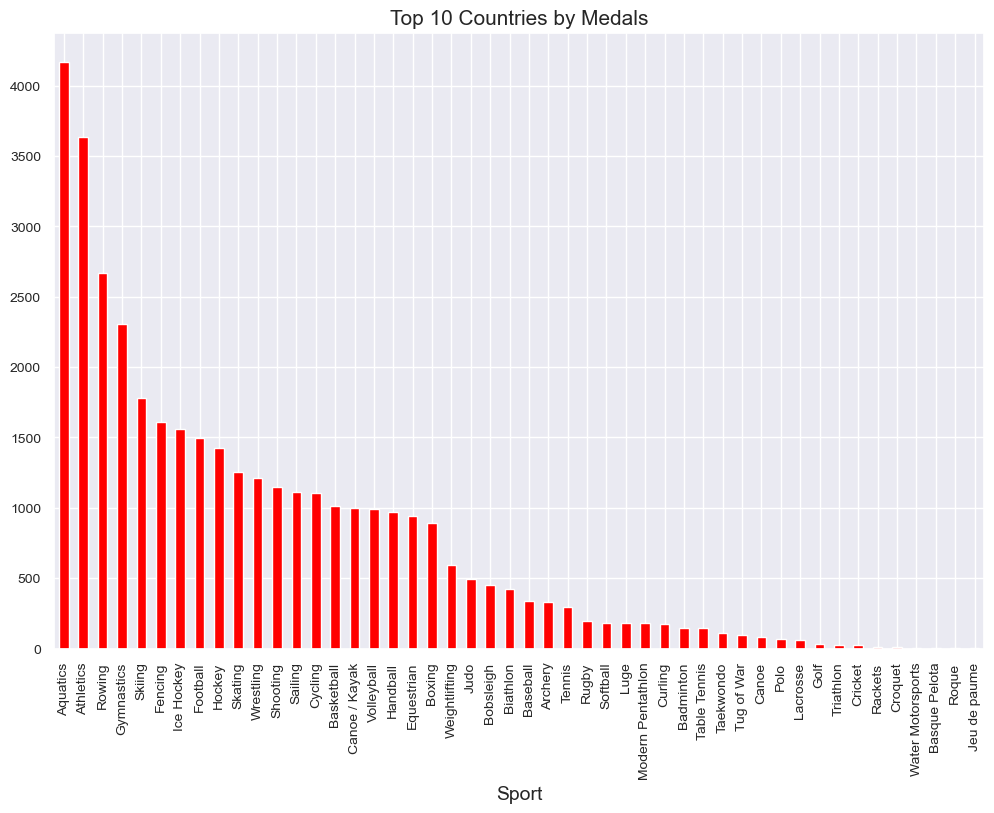

In [83]:
sport.plot(kind = "bar",color="red", fontsize = 10, figsize=(12,8))
plt.title("Top 10 Countries by Medals", fontsize = 15)
plt.xlabel("Sport", fontsize = 14)
plt.show()

As per our analysis it is evident that Aquatics is the most played sport in olympics with 4170 medals in total and Jeu de paume has least medals of 3. From this analysis it can be concluded that a country can take in account the top 20 games that has most medals ie., Aquatics, Athletics, Rowing, Gymnastics, Skiing, Fencing, Ice Hockey, Football, Hockey, Skating, Wrestling, Shooting, Sailing, Cycling, Basketball, Canoe, Volleyball, Equestrian, Boxing, Weightlifting and concentrate more on these games to secure more medals on upcoming olympics.

### Q.5 Analyze the top 10 performing countries in terms of Summer and Winter Olympics

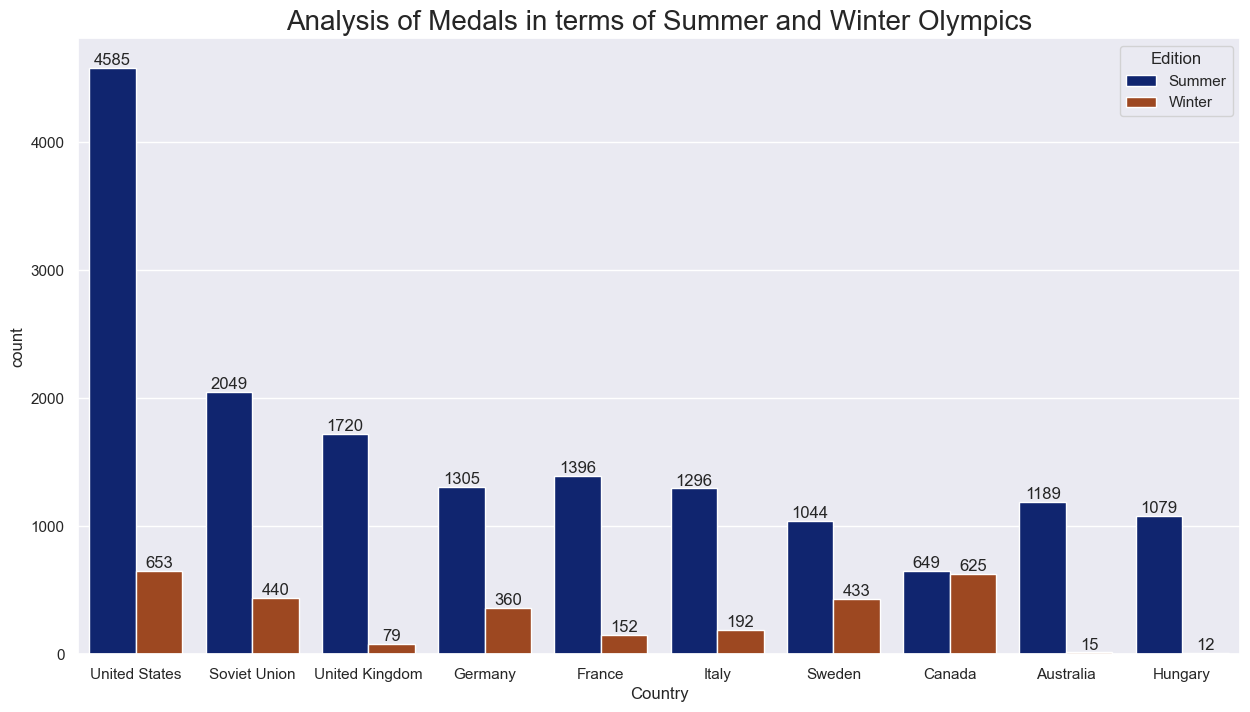

In [84]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1)
ax=sns.countplot(data=olympics_10,x='Country',hue='Edition',palette='dark',order=top_10.index)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Analysis of Medals in terms of Summer and Winter Olympics',fontsize=20)
plt.show()

### Q.6 Analyze Top 10 performing Countries in terms of Medals obtained

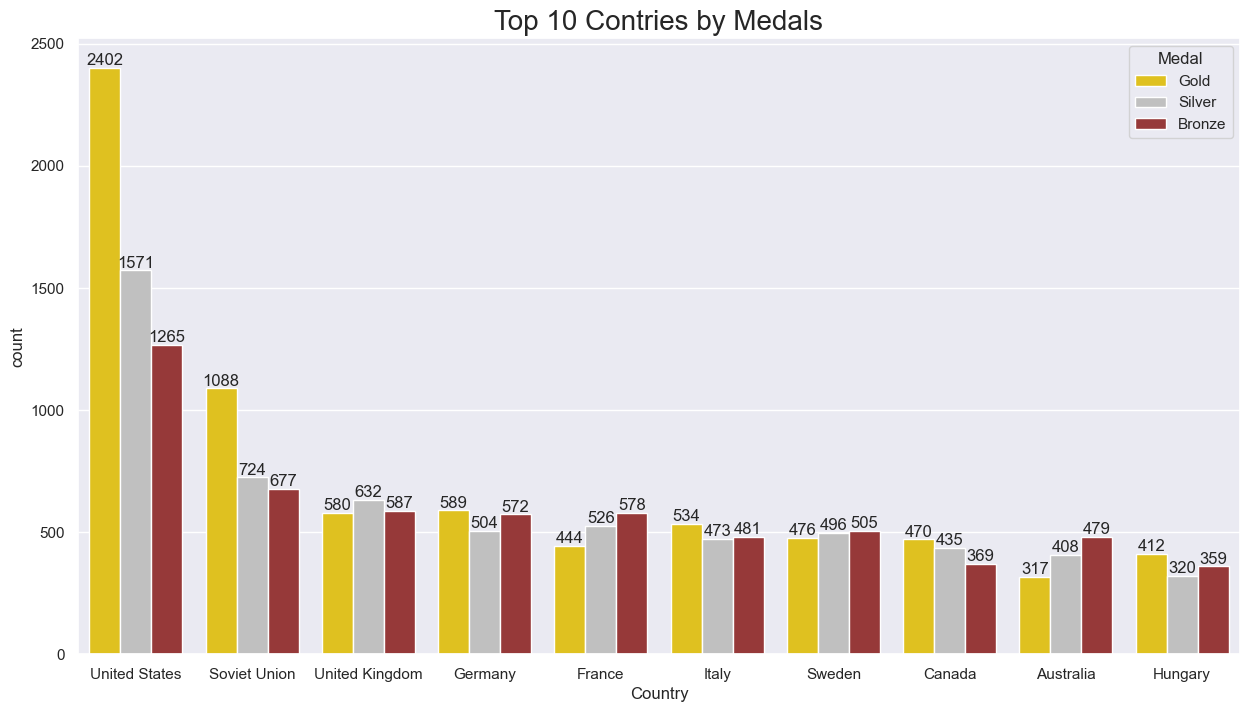

In [85]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1,palette='dark')
ax=sns.countplot(data=olympics_10,x='Country',hue='Medal',order=top_10.index,hue_order=['Gold','Silver','Bronze'],palette=['gold','silver','brown'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Top 10 Contries by Medals',fontsize=20)
plt.show()

### Q.7 Do GDP and Population matter?

Lets create aggregated and merged DataFrame with Top 50 Countrieswith new column Total_Games showing the number of Participations.

In [86]:
#creating crosstab with country and medals
medals_per_country = pd.crosstab(index = olympics.Country, columns = olympics.Medal, 
                                 margins = True, margins_name= "Total")
medals_per_country

Medal,Bronze,Gold,Silver,Total
Country,,,,
Afghanistan,2,0,0,2
Algeria,8,5,2,15
Argentina,91,69,99,259
Armenia,8,1,2,11
Australasia,5,20,4,29
...,...,...,...,...
West Indies Federation,5,0,0,5
Yugoslavia,119,143,180,442
Zambia,1,0,1,2


In [87]:
medals_per_country.drop("Total", axis = 0, inplace = True)

In [88]:
#Sorting medals as per hierarchical order and high to low.
medals_per_country = medals_per_country[["Total", "Gold", "Silver", "Bronze"]].sort_values(by = ["Total", "Gold", "Silver", "Bronze"], ascending = False)
medals_per_country.head(50)

Medal,Total,Gold,Silver,Bronze
Country,,,,
United States,5238,2402,1571,1265
Soviet Union,2489,1088,724,677
United Kingdom,1799,580,632,587
Germany,1665,589,504,572
France,1548,444,526,578
Italy,1488,534,473,481
Sweden,1477,476,496,505
Canada,1274,470,435,369
Australia,1204,317,408,479


In [89]:
#merging medals_per_country and dic dataframe 
medals_per_country = medals_per_country.merge(dic, how = "left", left_index = True, 
                                              right_on = "Country").drop(columns = ["Code"]).set_index("Country")

In [90]:
medals_per_country

,Total,Gold,Silver,Bronze,Population,GDP
Country,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426
Soviet Union,2489,1088,724,677,NaN,NaN
United Kingdom,1799,580,632,587,65138232.0,43875.969614
Germany,1665,589,504,572,81413145.0,41313.313995
France,1548,444,526,578,66808385.0,36205.568102
...,...,...,...,...,...,...
Iraq,1,0,0,1,36423395.0,4943.760388
Macedonia,1,0,0,1,2078453.0,4852.657848
Mauritius,1,0,0,1,1262605.0,9252.110724


In [91]:
#Here we do not know unique Olympic games played, Therefore concatenate Year and City where the game was held to obtain it and add it in new column games.
olympics['Games']=olympics.apply(lambda x:str(x.Year)+" "+x.City,axis=1)

In [92]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Games
0,Summer,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,Summer,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria,1896 Athens
2,Summer,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece,1896 Athens
3,Summer,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece,1896 Athens
4,Summer,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece,1896 Athens
...,...,...,...,...,...,...,...,...,...,...,...,...
36927,Winter,2014,Sochi,Skiing,Snowboard,Jenny Jones,GBR,Women,Slopestyle,Bronze,United Kingdom,2014 Sochi
36928,Winter,2014,Sochi,Skiing,Snowboard,Jamie Anderson,USA,Women,Slopestyle,Gold,United States,2014 Sochi
36929,Winter,2014,Sochi,Skiing,Snowboard,Dominique Maltais,CAN,Women,Snowboard Cross,Silver,Canada,2014 Sochi
36930,Winter,2014,Sochi,Skiing,Snowboard,Eva Samkova,CZE,Women,Snowboard Cross,Gold,Czech Republic,2014 Sochi


In [93]:
#No of unique games as per our Analysis data
olympics.Games.nunique()

49

In [94]:
#Number of Medals awarded in each unique Olympic games sorted from high to low
olympics.Games.value_counts()

Games
2008 Beijing                   2042
2000 Sydney                    2015
2004 Athens                    1998
2012 London                    1946
1996 Atlanta                   1859
1992 Barcelona                 1705
1988 Seoul                     1546
1984 Los Angeles               1459
1980 Moscow                    1387
1976 Montreal                  1305
1920 Antwerp                   1298
1972 Munich                    1185
1968 Mexico                    1031
1964 Tokyo                     1010
1952 Helsinki                   889
1956 Melbourne / Stockholm      885
1912 Stockholm                  885
1924 Paris                      884
1960 Rome                       882
1936 Berlin                     875
1948 London                     814
1908 London                     804
1928 Amsterdam                  710
1932 Los Angeles                615
2014 Sochi                      612
2006 Turin                      531
2010 Vancouver                  529
1900 Paris            

In [95]:
# Adding new column Total_Games indicating number of games each country participated
medals_per_country['Total_Games']=olympics.groupby('Country').apply(lambda x:x.Games.nunique())
medals_per_country

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426,48
Soviet Union,2489,1088,724,677,NaN,NaN,18
United Kingdom,1799,580,632,587,65138232.0,43875.969614,42
Germany,1665,589,504,572,81413145.0,41313.313995,25
France,1548,444,526,578,66808385.0,36205.568102,47
...,...,...,...,...,...,...,...
Iraq,1,0,0,1,36423395.0,4943.760388,1
Macedonia,1,0,0,1,2078453.0,4852.657848,1
Mauritius,1,0,0,1,1262605.0,9252.110724,1


In [96]:
#we can apply Rank function to the medals_per_country dataframe to identify the ranking in terms of each of the column ie., Total medals, population, Gdp and Tital games participated.
medals_per_country.rank(ascending = False).head(50)

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,1.0,1.0,1.0,1.0,3.0,7.0,1.0
Soviet Union,2.0,2.0,2.0,2.0,NaN,NaN,28.0
United Kingdom,3.0,4.0,3.0,3.0,20.0,13.0,10.0
Germany,4.0,3.0,5.0,5.0,15.0,18.0,19.0
France,5.0,8.0,4.0,4.0,19.0,22.0,3.0
Italy,6.0,5.0,7.0,7.0,21.0,25.0,9.0
Sweden,7.0,6.0,6.0,6.0,71.0,10.0,3.0
Canada,8.0,7.0,8.0,12.0,35.0,15.0,3.0
Australia,9.0,13.0,9.0,8.0,46.0,6.0,14.0


In [97]:
#For our analysis Category of Medal is least important hence removing it
medals_per_country.drop(columns = ["Gold", "Silver", "Bronze"], inplace = True)

## Statistical Analysis and Hypothesis Testing with scipy

### What is Correlation

Correlational analysis is a bivariate (two variable) statistical procedure that sets out to identify the mean value of the product of the standard scores of matched pairs of observations. The purpose of this type of analysis is to find out whether changes in one variable produce changes in another.

### Pearson Vs Spearman Correlation

Pearson and Spearman correlation coefficients are two widely used statistical measures when measuring the relationship between variables. The Pearson correlation coefficient assesses the linear relationship between variables, while the Spearman correlation coefficient evaluates the monotonic relationship.

Imagine you have two variables such plotted on a simple scatter plot graph. The Pearson correlation essentially tries to utilize a scatter plot by drawing a line through the data in order to find out whether the two compariables are covary with one another and to what extent. 

The Spearman’s test is a non-parametric version of the parametric Pearson bivariate correlation coefficient. A parametric statistical test is a test that makes clear assumptions about the defining properties, or parameters, of the dataset. For a dataset to be appropriate for the parametric version of correlational analysis (i.e. the Pearson correlation), the following assumptions must be met:

1) Each variable must be continuous in nature. In other words, each variable is able to take on a potentially infinite number of values, such as age, income or score evaluations.
2) The shape of the relationship between the variables must be linear. This means that when a scatter plot of the two variables is drawn, the shape of the line of best fit should approximate a straight line rather than a curve.

If either of these assumptions are violated, you should use the nonparametric version of the correlation technique, known as Spearman’s correlation, Spearman’s rank-order test, or Spearman’s rho
Like the Pearson test, the Spearman correlation test examines whether two variables are correlated with one another or not. The Spearman’s test can be used to analyse ordinal level, as well as continuous level data, because it uses ranks instead of assumptions of normality. This makes the Spearman correlation great for ordinal survey questions.

The Spearman’s test is therefore useful where the basic assumptions of linearity and continuous variables necessary to perform a Pearson's bivariate correlation analysis have not been met.

In [98]:
medals_per_country.corr(method = "spearman")

,Total,Population,GDP,Total_Games
Total,1.000000,0.419755,0.458478,0.928627
Population,0.419755,1.000000,-0.239097,0.402098
GDP,0.458478,-0.239097,1.000000,0.498056
Total_Games,0.928627,0.402098,0.498056,1.000000


In [99]:
medals_per_country.rank(ascending = False).corr(method = "pearson")

,Total,Population,GDP,Total_Games
Total,1.000000,0.419815,0.458415,0.928627
Population,0.419815,1.000000,-0.239567,0.401414
GDP,0.458415,-0.239567,1.000000,0.496813
Total_Games,0.928627,0.401414,0.496813,1.000000


In [100]:
import scipy.stats as stats

### Hypothesis 1: There is no relationship between Total Medals and Population

In [101]:
stats.spearmanr(medals_per_country.Total, medals_per_country.Population, 
                             nan_policy = "omit")

SignificanceResult(statistic=0.41975527887063924, pvalue=8.132240868116897e-07)

In [102]:
r, p_value = stats.spearmanr(medals_per_country.Total, medals_per_country.Population, 
                             nan_policy = "omit")

In [103]:
r

0.41975527887063924

In [104]:
round(p_value)

0

Reject Hypothesis 1 -> There is a significant (positive) relationship between Total Medals and Population

### Hypothesis 2: There is no relationship between Total Medals and GDP per Capita

In [105]:
r, p_value = stats.spearmanr(medals_per_country.Total, medals_per_country.GDP,
                             nan_policy = "omit")

In [106]:
r

0.45847787983426685

In [107]:
round(p_value)

0

Reject Hypothesis 2 -> There is a significant (positive) relationship between Total Medals and GDP per Capita

### Hypothesis 3: There is no relationship between Total Medals and Participations

In [108]:
r, p_value = stats.spearmanr(medals_per_country.head(50).Total, 
                             medals_per_country.head(50).Total_Games)

In [109]:
r

0.6818689415046658

In [110]:
round(p_value)

0

Reject Hypothesis 3 -> There is a significant (positive) relationship between Total Medals and Participations

### Q.8 Analyze the Olympic games in terms of Medals, Edition and Gender

create Seaborn Heatmap with Medal Ranks for Top 50 Countries (Total Medals, Summer Games Medals, Winter Games Medals, Men, Women).

In [111]:
sum_vs_win = pd.crosstab(olympics.Country, olympics.Edition)
sum_vs_win

Edition,Summer,Winter
Country,,
Afghanistan,2,0
Algeria,15,0
Argentina,259,0
Armenia,11,0
Australasia,29,0
...,...,...
West Germany,490,94
West Indies Federation,5,0
Yugoslavia,435,7


In [112]:
men_vs_women =  pd.crosstab(olympics.Country, olympics.Gender)
men_vs_women

Gender,Men,Women
Country,,
Afghanistan,2,0
Algeria,12,3
Argentina,187,72
Armenia,11,0
Australasia,27,2
...,...,...
West Germany,450,134
West Indies Federation,5,0
Yugoslavia,379,63


In [113]:
medals_by_cats = pd.concat([sum_vs_win, men_vs_women], axis = 1)
medals_by_cats

,Summer,Winter,Men,Women
Country,,,,
Afghanistan,2,0,2,0
Algeria,15,0,12,3
Argentina,259,0,187,72
Armenia,11,0,11,0
Australasia,29,0,27,2
...,...,...,...,...
West Germany,490,94,450,134
West Indies Federation,5,0,5,0
Yugoslavia,435,7,379,63


In [114]:
medals_by_cats["Total"] = medals_by_cats.Summer + medals_by_cats.Winter
medals_by_cats.sort_values("Total", ascending = False, inplace = True)

In [115]:
medals_by_cats

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,4585,653,3618,1620,5238
Soviet Union,2049,440,1807,682,2489
United Kingdom,1720,79,1470,329,1799
Germany,1305,360,1119,546,1665
France,1396,152,1351,197,1548
...,...,...,...,...,...
Iraq,1,0,1,0,1
Senegal,1,0,1,0,1
Macedonia,1,0,1,0,1


In [116]:
ranks = medals_by_cats.rank(ascending = False, method = "average")
ranks

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
Germany,5.0,7.0,7.0,4.0,4.0
France,4.0,14.0,4.0,16.5,5.0
...,...,...,...,...,...
Iraq,132.5,95.5,127.0,120.0,133.5
Senegal,132.5,95.5,127.0,120.0,133.5
Macedonia,132.5,95.5,127.0,120.0,133.5


In [117]:
top_50 = ranks.head(50)
top_20 = ranks.head(20)

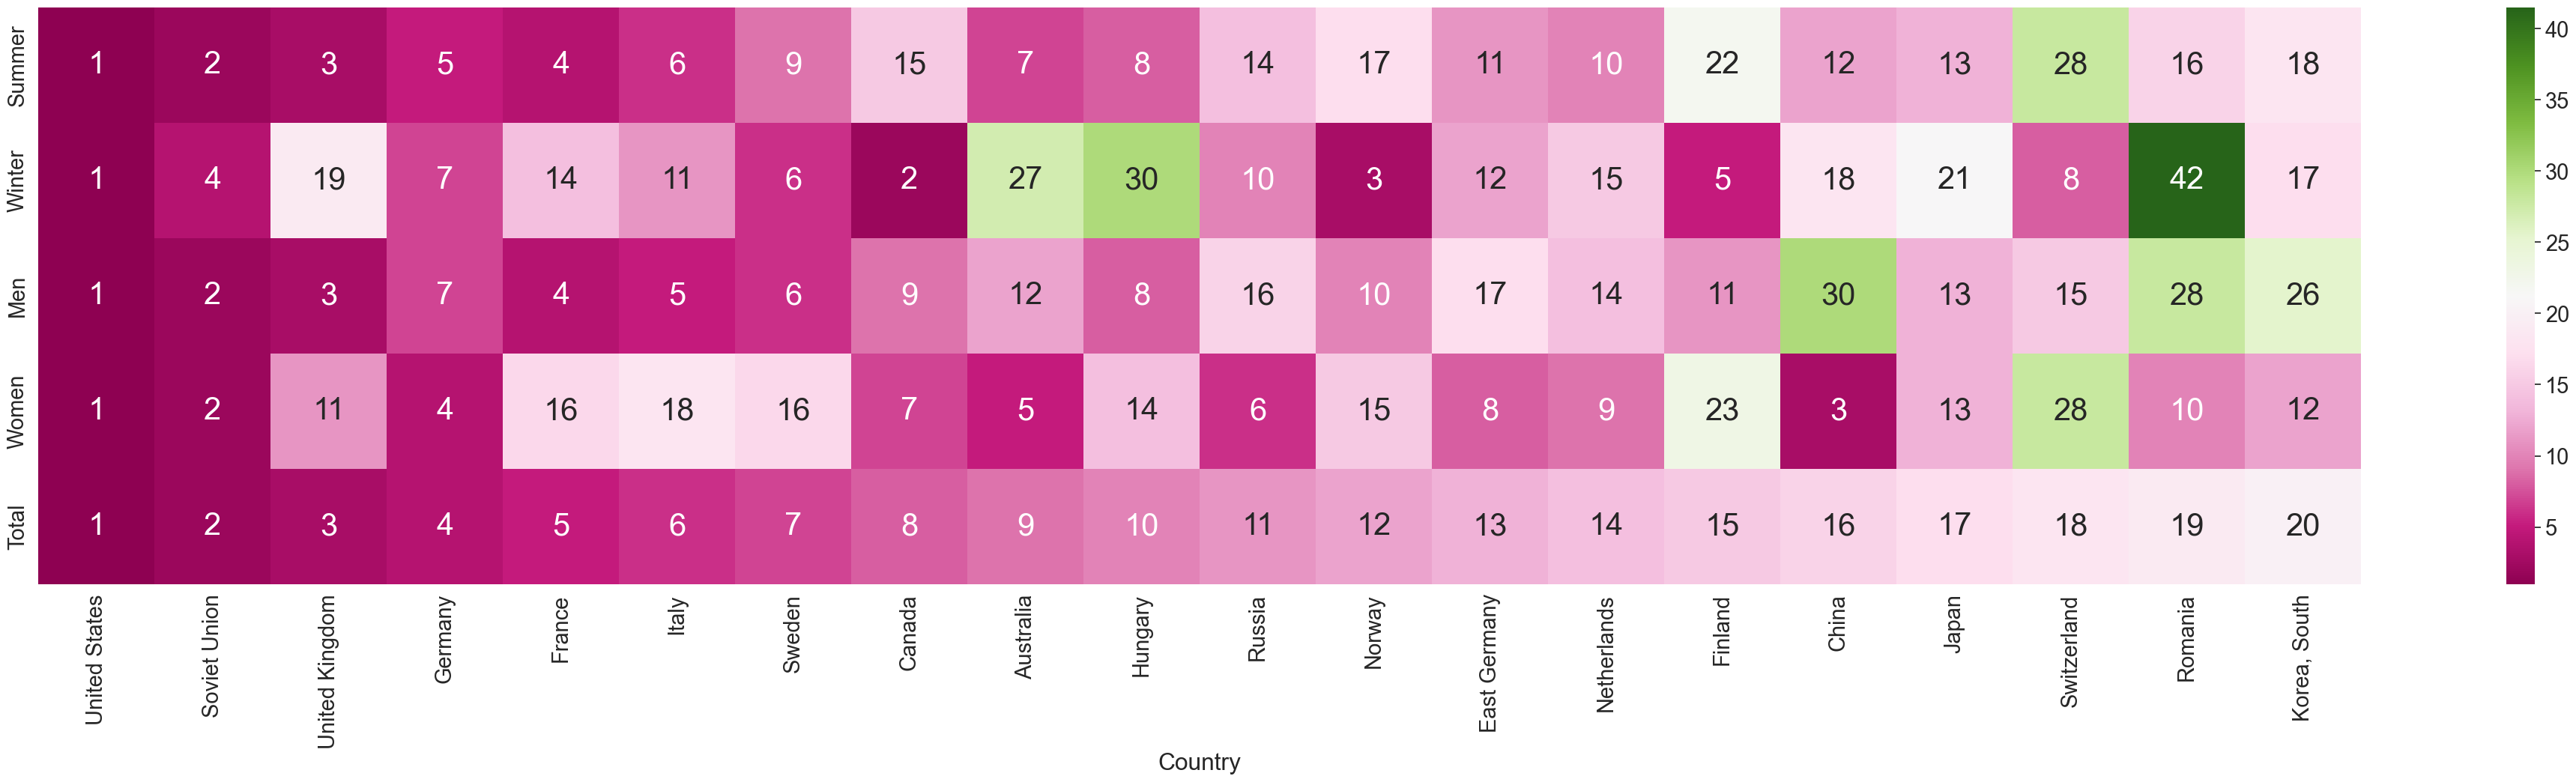

In [118]:
plt.figure(figsize = (50, 10))
sns.set(font_scale=1.9)
sns.heatmap(top_20.T,cmap='PiYG',annot=True,annot_kws={'fontsize':30})
plt.show()

### Q.9 Identify which countries are equally successful in Summer and Winter Games, more successful in Summer Games and more successful in Winter Games

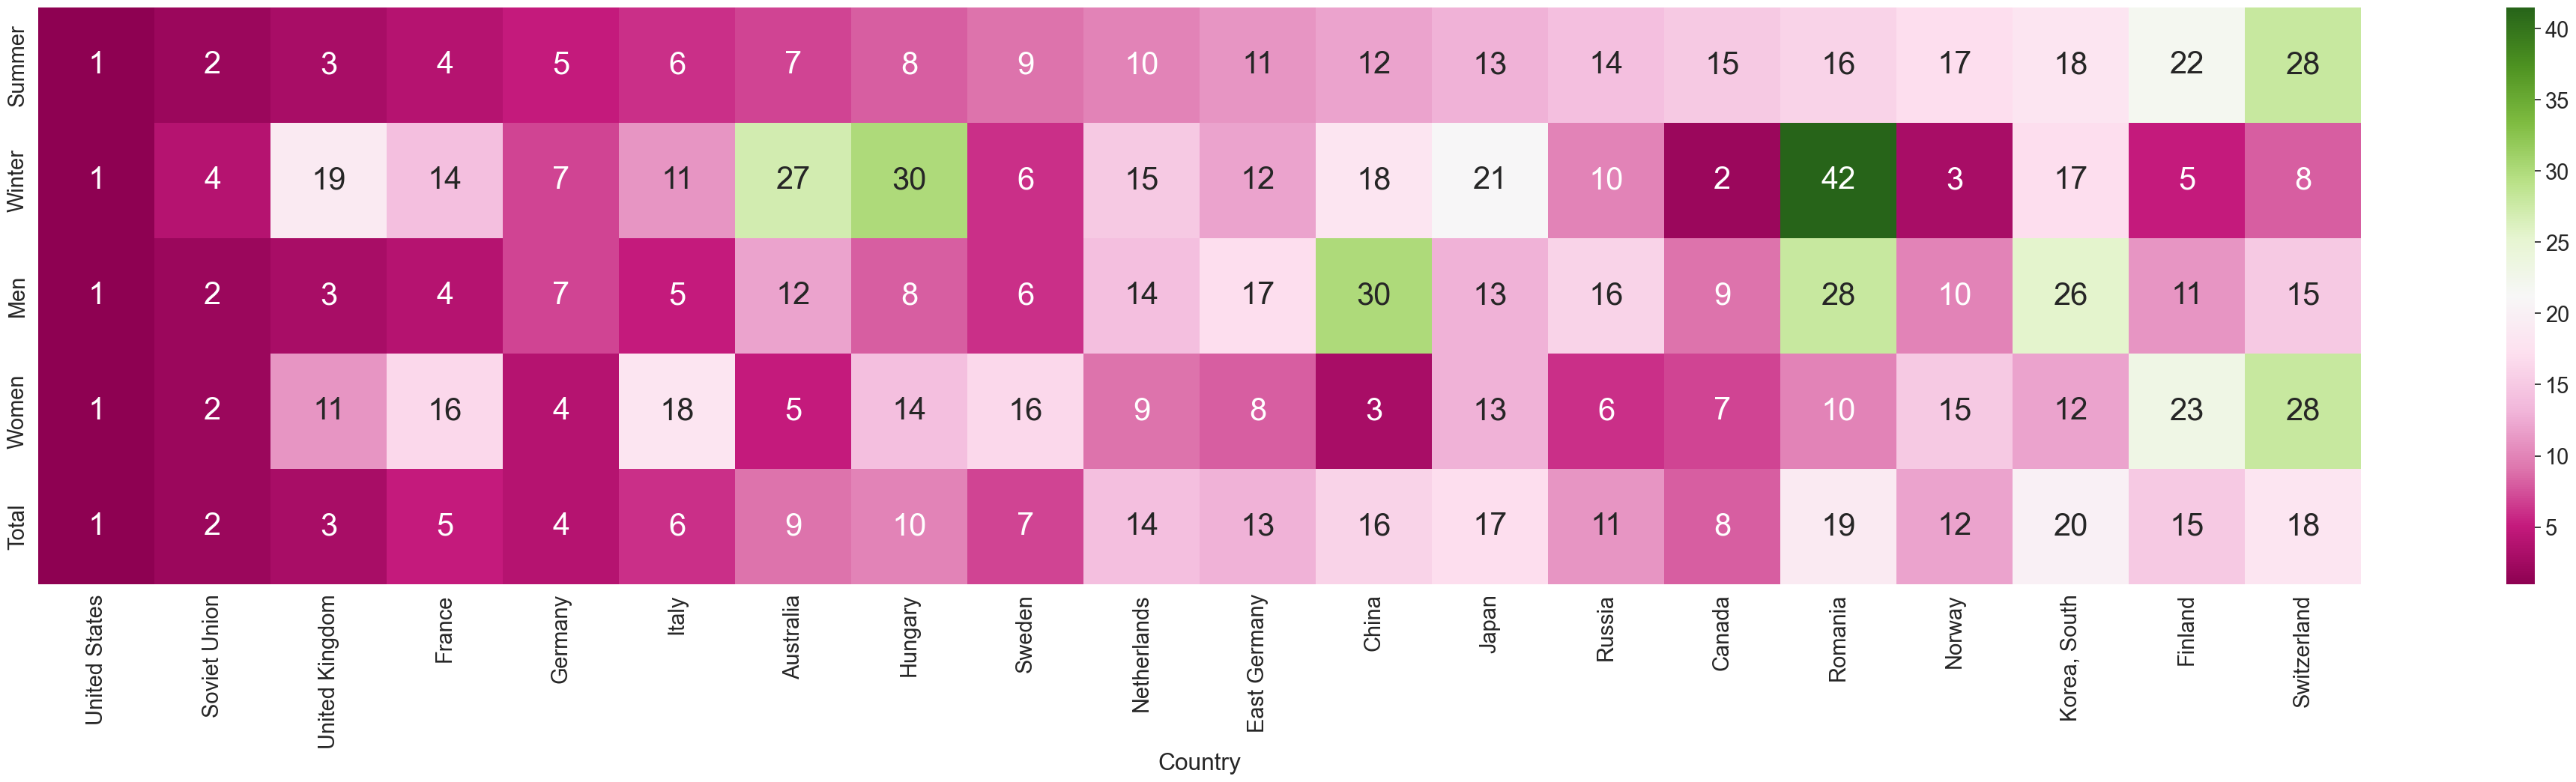

In [119]:
plt.figure(figsize = (50, 10))
sns.heatmap(top_20.sort_values(by = "Summer").T,cmap='PiYG',annot=True,annot_kws={'fontsize':30})
plt.show()

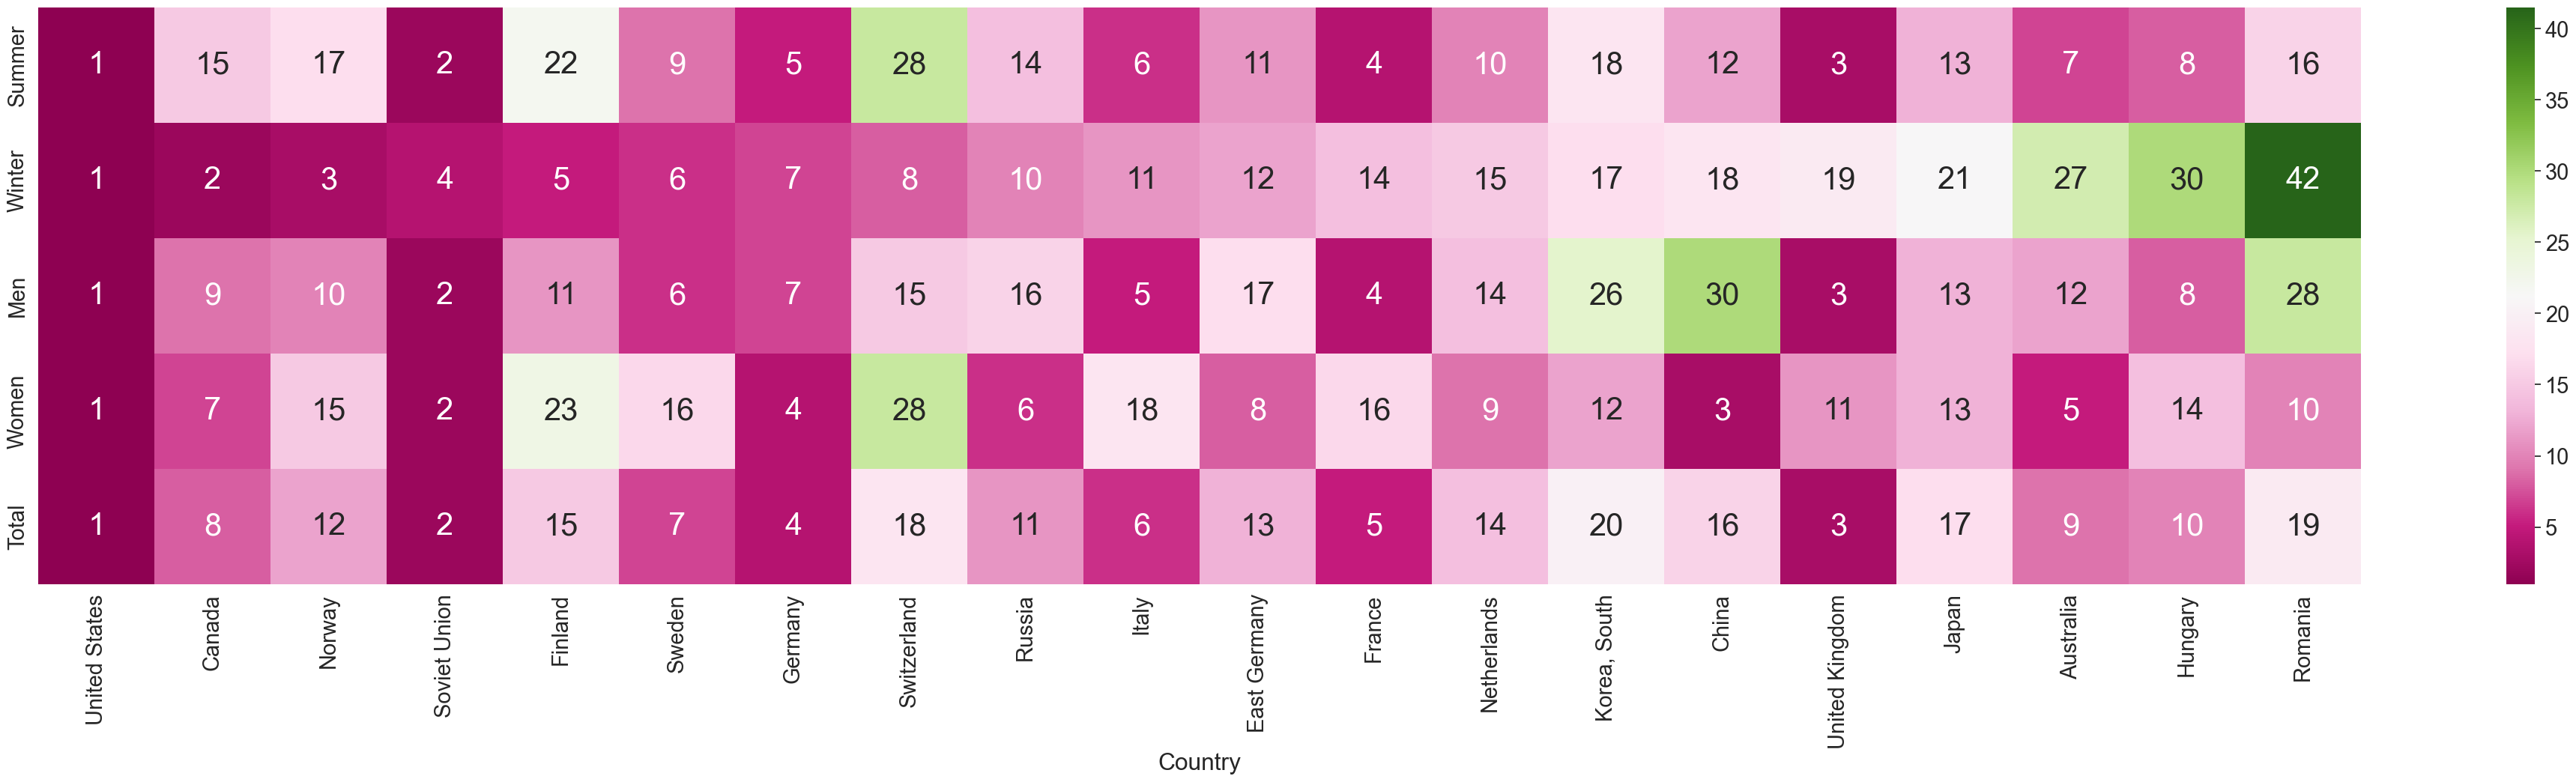

In [120]:
plt.figure(figsize = (50, 10))
sns.heatmap(top_20.sort_values(by = "Winter").T,cmap='PiYG',annot=True,annot_kws={'fontsize':30})
plt.show()

In [121]:
rank_diff = top_50.Summer.sub(top_50.Winter).sort_values().to_frame()
rank_diff

,0
Country,
Brazil,-70.5
Cuba,-68.5
Argentina,-63.5
India,-60.5
Greece,-58.5
Jamaica,-56.5
Pakistan,-55.5
South Africa,-52.0
Mexico,-52.0


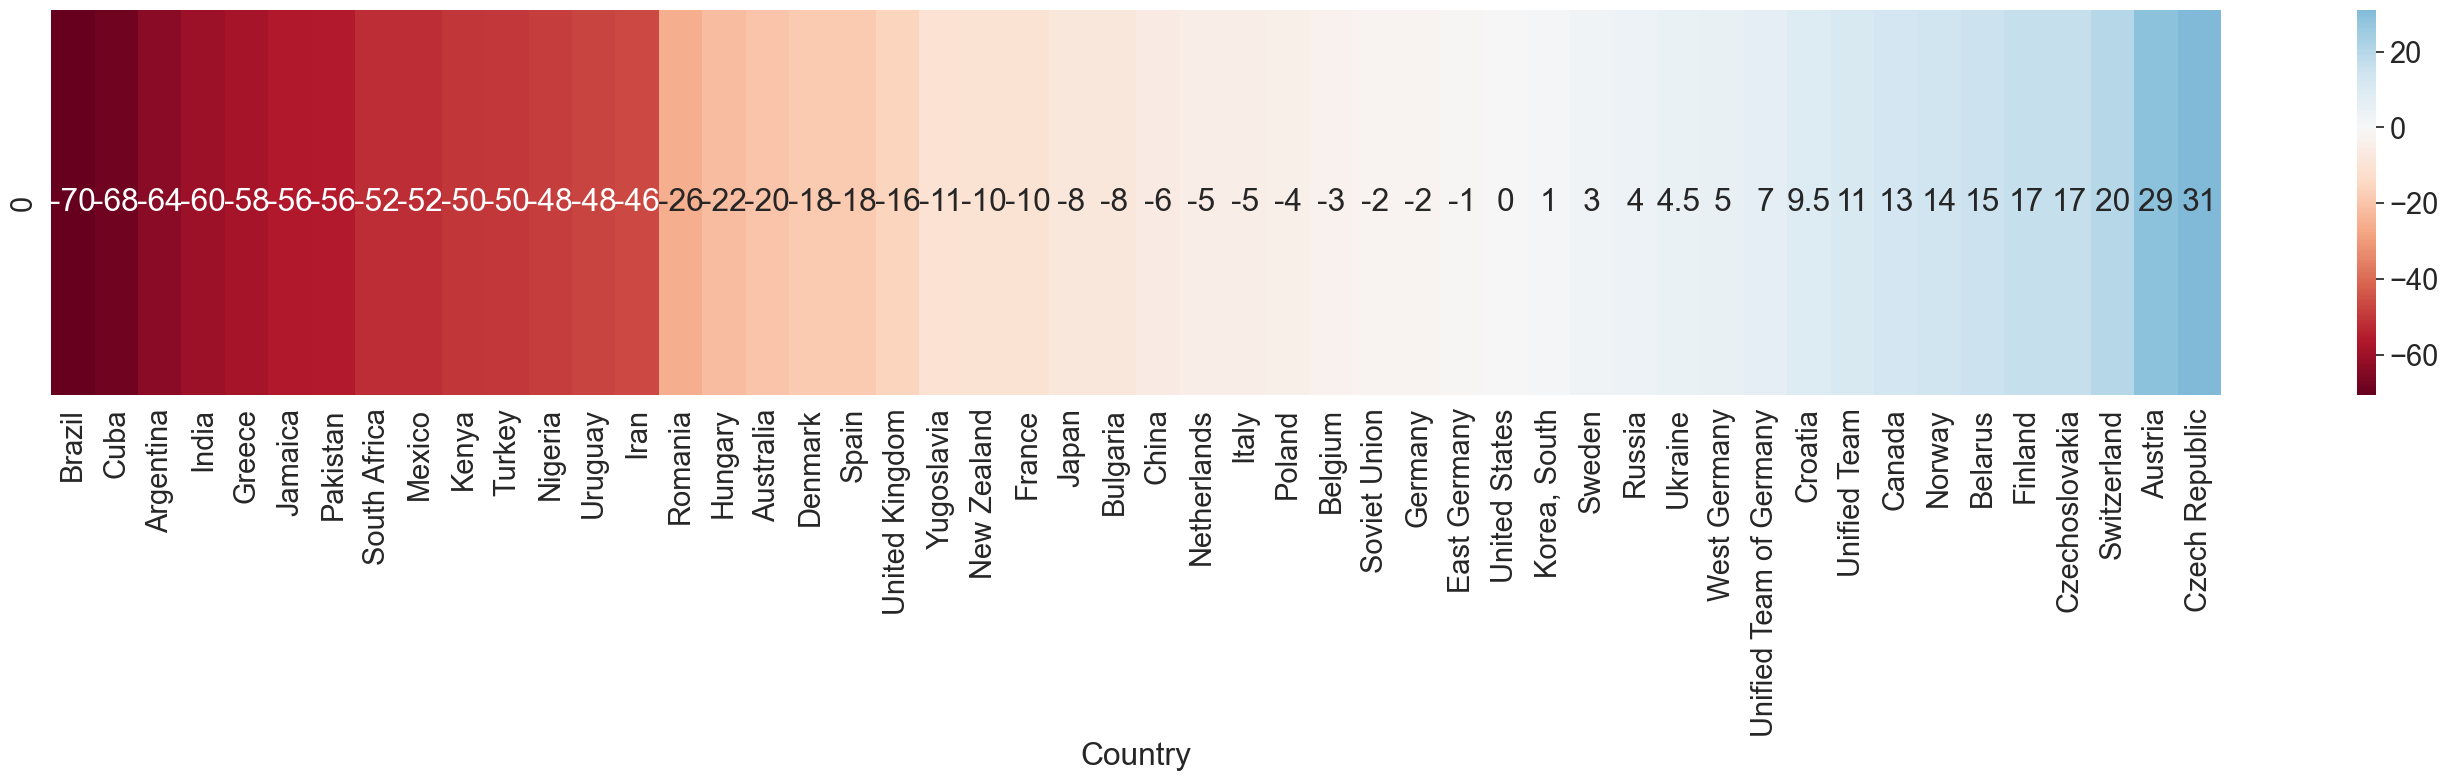

In [122]:
plt.figure(figsize = (35, 5))
sns.heatmap(rank_diff.T,cmap='RdBu',annot=True, center = 0)
plt.show()

    As per our analysis the countries in range -5 to +5 Netherlands, Italy, Poland, Belgium, 
    Soviet Union, Germany, United States, South Korea, Sweden, Russia, Ukraine, East and West 
    Germany are equally successful/ performing equally in both Summer and Winter Olympics. Where 
    as Countries like  Iran, Uruguay, Nigeria, Turkey,Kenya, Mexico, South Africa, Pakistan, 
    Jamaica, Greece, India, Argentina, Cuba and Brazil are more successful in Summer Olympics 
    compared to their performance in winter olympics. Austria and Czech Republic are more 
    successful in Winter Olympics compared to their perormance in Summer olympics 

### Q.10 Identify the countries in which Men and Women are equally successful in Olympics, Men are more successful and Women are more successful

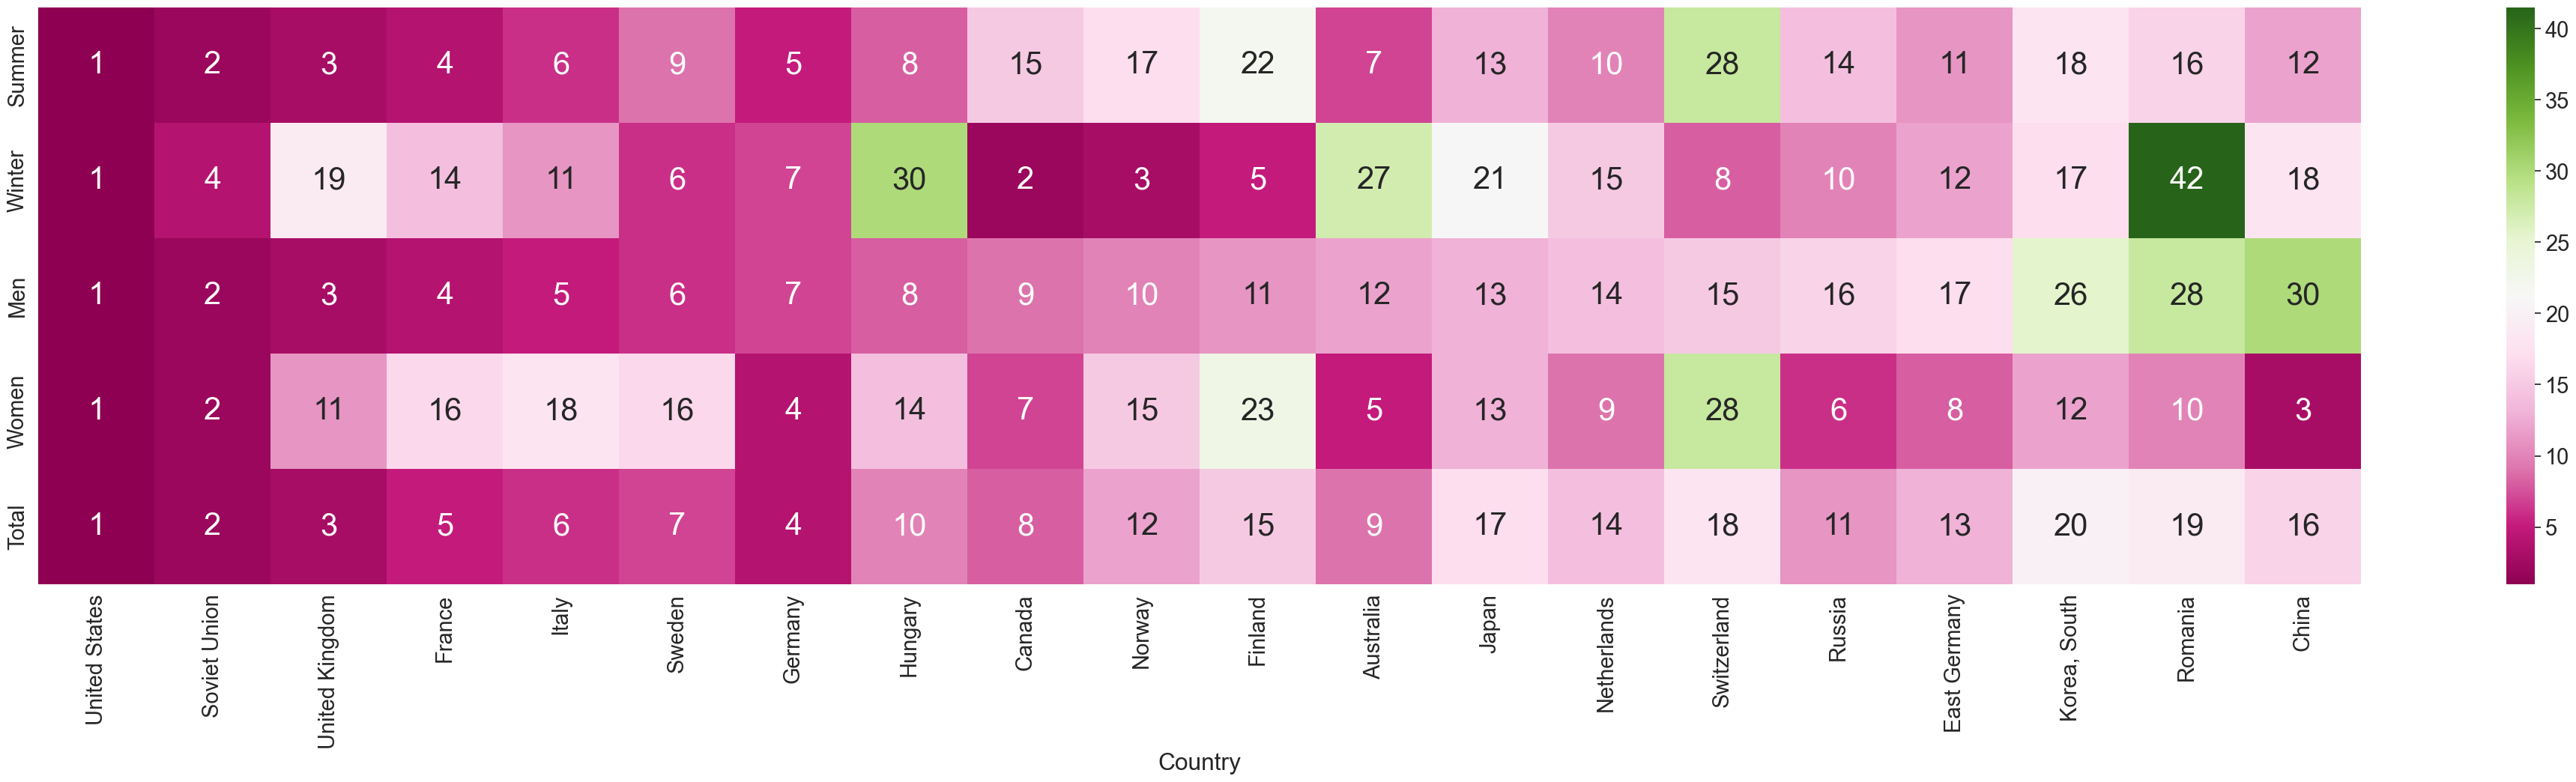

In [123]:
plt.figure(figsize = (50, 10))
sns.heatmap(top_20.sort_values(by = "Men").T,cmap='PiYG',annot=True,annot_kws={'fontsize':30})
plt.show()

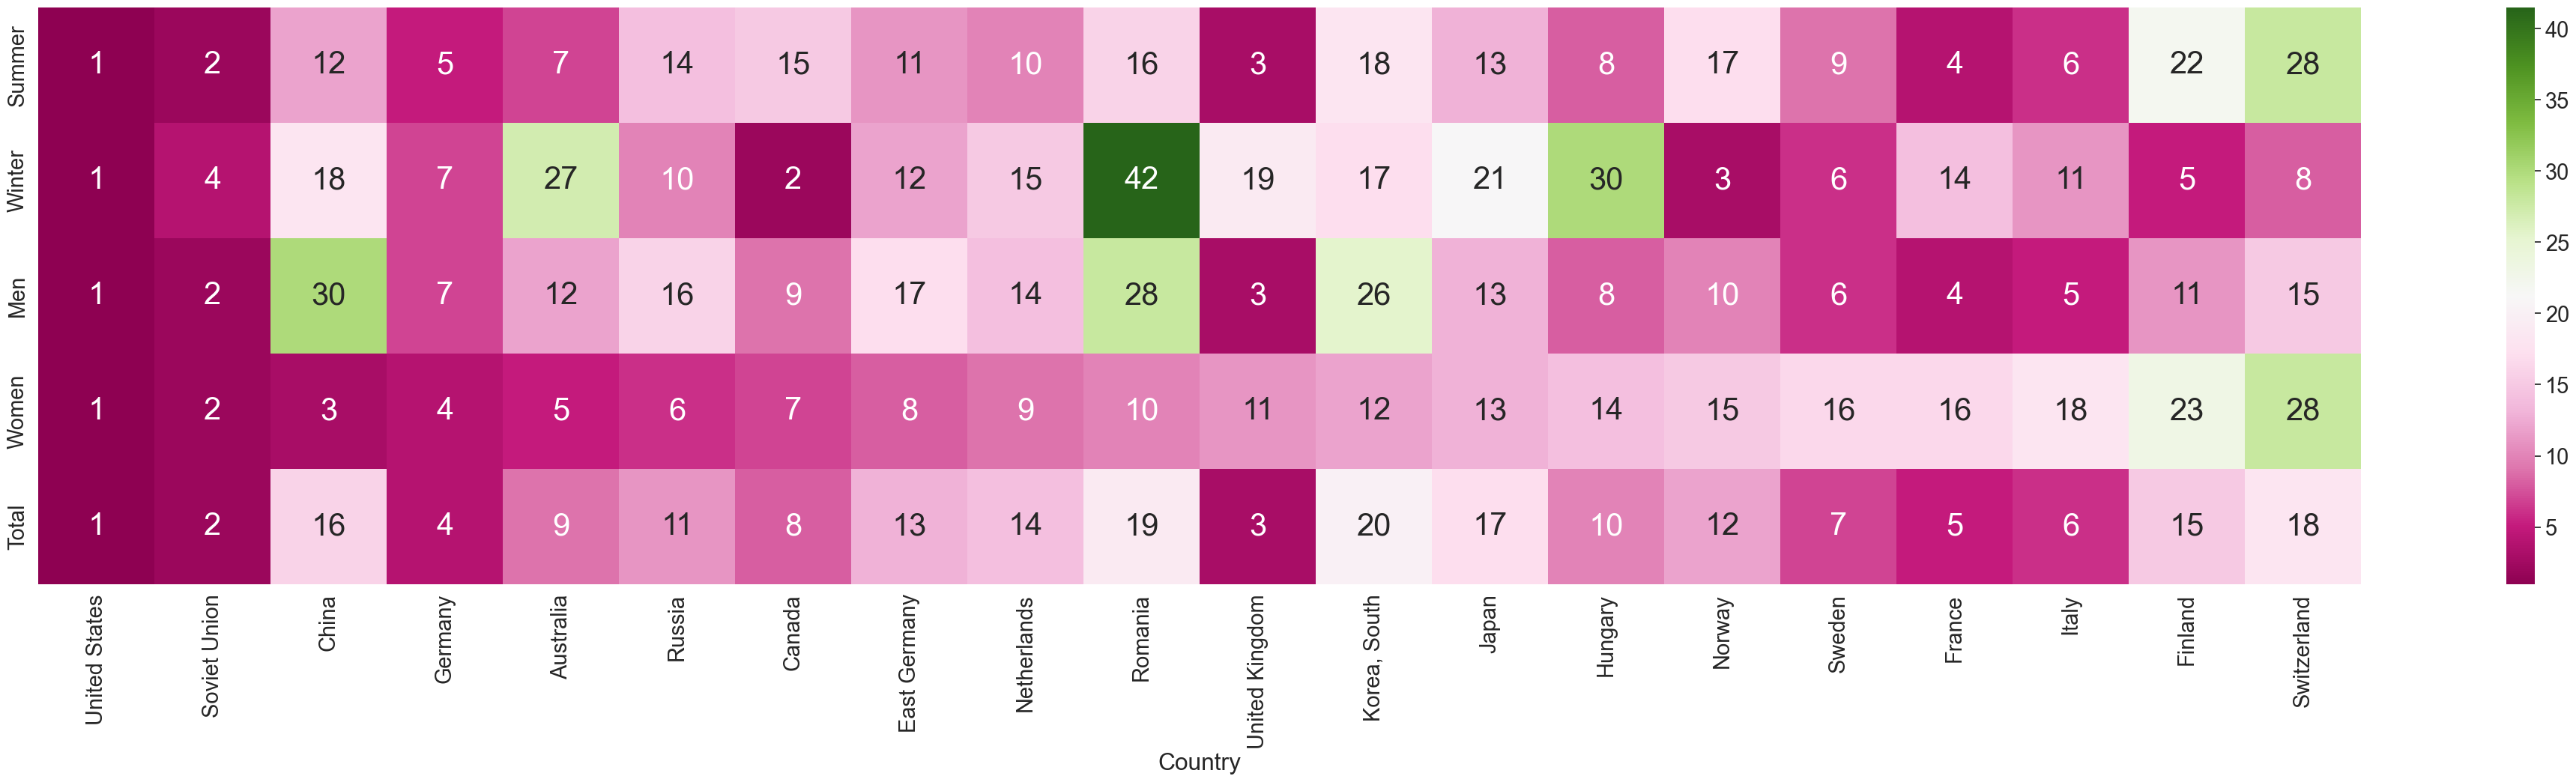

In [124]:
plt.figure(figsize = (50, 10))
sns.heatmap(top_20.sort_values(by = "Women").T,cmap='PiYG',annot=True,annot_kws={'fontsize':30})
plt.show()

In [125]:
rank_diff2 = top_50.Men.sub(top_50.Women).sort_values().to_frame()
rank_diff2

,0
Country,
Pakistan,-83.0
Uruguay,-74.0
Iran,-72.0
India,-37.5
Belgium,-22.0
Croatia,-15.5
Turkey,-13.5
Yugoslavia,-13.0
Italy,-13.0


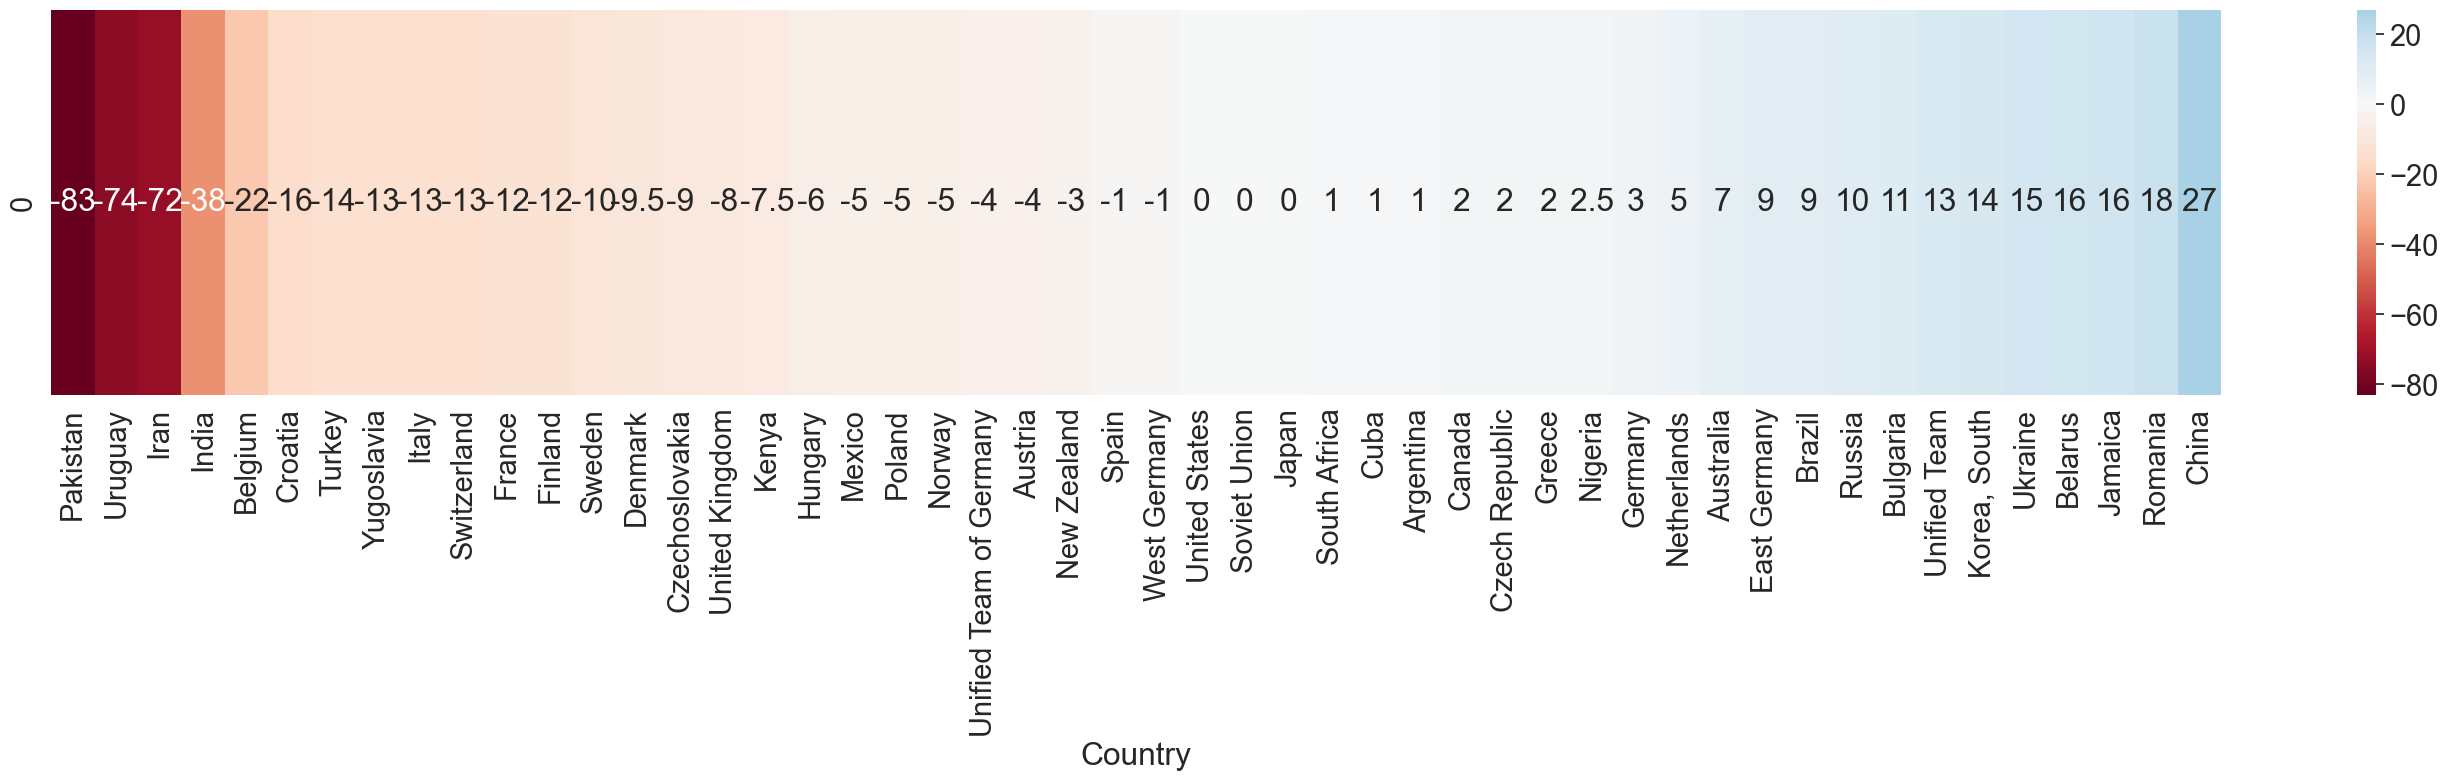

In [126]:
plt.figure(figsize = (35, 5))
sns.heatmap(rank_diff2.T,cmap='RdBu',annot=True, center = 0)
plt.show()

   As per our analysis the countries in range -5 to 5 ie., Mexico, Poland, Norway, Germany, Austria, 
New zealand, Spain, United States, Soviet Union, Japan, South Africa, Cuba, Argentina, Canada, 
Czech Republic, Greece, Nigeria and Netherlands has Olympians peforming equally i.e, both male and female are equally successful. Countries like India, Iran, Uruguay, Pakistan has good Male 
Olympians and needs to improve on Female Olympians whereas countries like China has good 
female olympians.  

### Q.11 Can you analyze the Sports in which each country Concentrate more?

In [127]:
#getting unique sporrts as list
sports = olympics.Sport.value_counts().index
sports

Index(['Aquatics', 'Athletics', 'Rowing', 'Gymnastics', 'Skiing', 'Fencing',
       'Ice Hockey', 'Football', 'Hockey', 'Skating', 'Wrestling', 'Shooting',
       'Sailing', 'Cycling', 'Basketball', 'Canoe / Kayak', 'Volleyball',
       'Handball', 'Equestrian', 'Boxing', 'Weightlifting', 'Judo',
       'Bobsleigh', 'Biathlon', 'Baseball', 'Archery', 'Tennis', 'Rugby',
       'Softball', 'Luge', 'Modern Pentathlon', 'Curling', 'Badminton',
       'Table Tennis', 'Taekwondo', 'Tug of War', 'Canoe', 'Polo', 'Lacrosse',
       'Golf', 'Triathlon', 'Cricket', 'Rackets', 'Croquet',
       'Water Motorsports', 'Basque Pelota', 'Roque', 'Jeu de paume'],
      dtype='object', name='Sport')

In [128]:
top20 = olympics.Country.value_counts().head(20).index
top20

Index(['United States', 'Soviet Union', 'United Kingdom', 'Germany', 'France',
       'Italy', 'Sweden', 'Canada', 'Australia', 'Hungary', 'Russia', 'Norway',
       'East Germany', 'Netherlands', 'Finland', 'China', 'Japan',
       'Switzerland', 'Romania', 'Korea, South'],
      dtype='object', name='Country')

In [129]:
by_sport = pd.crosstab(olympics.Country, olympics.Sport)
by_sport

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
Algeria,0,0,7,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
Argentina,3,0,5,0,0,24,0,0,0,24,...,0,0,1,6,0,0,12,0,2,0
Armenia,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,6
Australasia,11,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Germany,62,0,67,0,0,0,0,14,22,6,...,0,0,0,3,0,0,0,0,7,9
West Indies Federation,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yugoslavia,91,0,2,0,0,96,0,0,0,11,...,0,4,0,0,0,0,24,0,0,16


In [130]:
by_sport = by_sport.rank(ascending = False, method = "average")
by_sport

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,101.0,84.0,122.0,78.0,76.0,83.0,74.0,84.5,80.5,112.0,...,75.0,79.0,19.5,90.5,79.0,76.5,86.0,74.0,103.5,103.0
Algeria,101.0,84.0,47.0,78.0,76.0,83.0,74.0,84.5,80.5,35.0,...,75.0,79.0,89.5,90.5,79.0,76.5,86.0,74.0,103.5,103.0
Argentina,41.0,84.0,53.5,78.0,76.0,11.5,74.0,84.5,80.5,9.0,...,75.0,79.0,28.0,12.0,79.0,76.5,17.0,74.0,45.5,103.0
Armenia,101.0,84.0,122.0,78.0,76.0,83.0,74.0,84.5,80.5,70.5,...,75.0,79.0,89.5,90.5,79.0,76.5,86.0,74.0,35.5,40.0
Australasia,30.5,84.0,88.0,78.0,76.0,83.0,74.0,84.5,80.5,70.5,...,75.0,79.0,89.5,31.0,79.0,76.5,86.0,74.0,103.5,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Germany,18.0,84.0,16.0,78.0,76.0,83.0,74.0,9.0,6.5,35.0,...,75.0,79.0,89.5,21.0,79.0,76.5,86.0,74.0,28.5,32.0
West Indies Federation,101.0,84.0,53.5,78.0,76.0,83.0,74.0,84.5,80.5,112.0,...,75.0,79.0,89.5,90.5,79.0,76.5,86.0,74.0,103.5,103.0
Yugoslavia,16.0,84.0,70.0,78.0,76.0,3.0,74.0,84.5,80.5,25.5,...,75.0,5.5,89.5,90.5,79.0,76.5,12.0,74.0,103.5,20.0


In [131]:
by_sport = by_sport.loc[top20, sports].copy()
by_sport

Sport,Aquatics,Athletics,Rowing,Gymnastics,Skiing,Fencing,Ice Hockey,Football,Hockey,Skating,...,Lacrosse,Golf,Triathlon,Cricket,Rackets,Croquet,Water Motorsports,Basque Pelota,Roque,Jeu de paume
Country,,,,,,,,,,,,,,,,,,,,,
United States,1.0,1.0,1.0,2.0,8.0,7.0,2.0,1.0,12.0,1.0,...,3.0,1.0,9.5,74.0,73.5,73.5,74.0,74.0,1.0,2.0
Soviet Union,4.0,3.0,7.0,1.0,5.0,4.0,5.0,3.0,11.0,4.0,...,74.5,74.5,79.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
United Kingdom,10.5,2.0,2.0,19.0,34.5,15.0,10.0,20.0,5.0,16.0,...,2.0,2.0,5.0,1.5,1.0,73.5,1.0,74.0,73.5,1.0
Germany,5.0,7.0,5.0,16.0,6.0,6.0,13.0,7.5,4.0,9.0,...,74.5,74.5,5.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
France,14.0,8.0,11.0,17.0,10.0,2.0,79.5,23.0,83.0,17.0,...,74.5,74.5,79.0,1.5,73.5,1.0,2.0,1.5,73.5,74.0
Italy,12.0,14.0,8.0,8.5,9.0,1.0,79.5,7.5,83.0,11.5,...,74.5,74.5,79.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
Sweden,15.0,9.0,30.0,5.0,4.0,12.0,3.0,13.5,83.0,15.0,...,74.5,74.5,9.5,74.0,73.5,73.5,74.0,74.0,73.5,74.0
Canada,13.0,12.5,3.0,30.5,12.0,90.0,1.0,22.0,83.0,2.0,...,1.0,3.0,5.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
Australia,2.0,12.5,9.0,37.0,21.5,90.0,79.5,90.5,2.0,24.0,...,74.5,74.5,1.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0


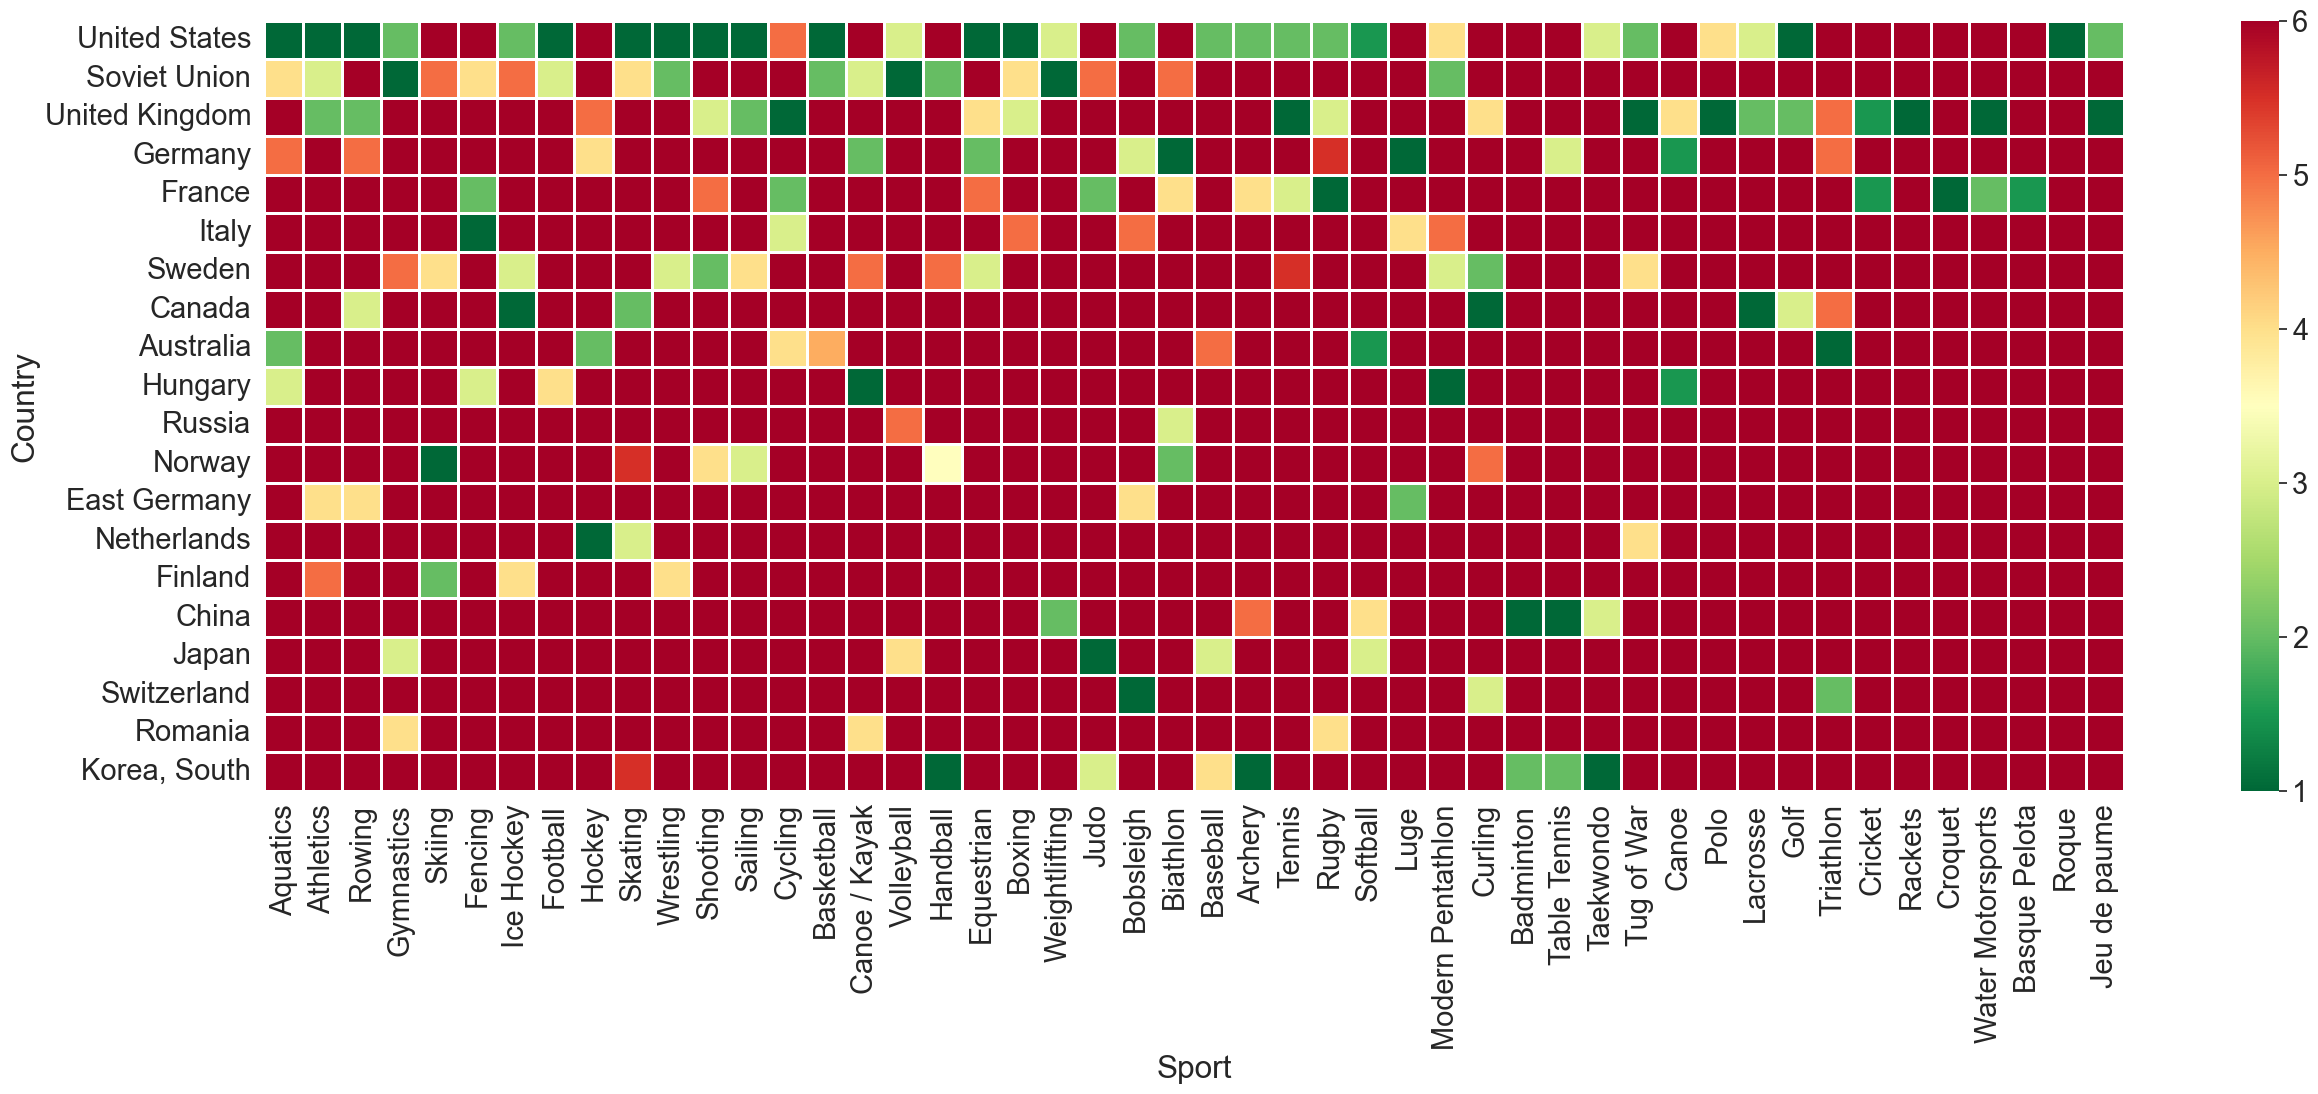

In [132]:
plt.figure(figsize = (30, 10))
sns.heatmap(by_sport,cmap='RdYlGn_r', vmin = 1, vmax = 6, linewidth = 1)
plt.show()

 As per our analysis the green colour shaded region represents the sport in which the country is efficient and mild green and yellow represents partial efficiency. This gives us overall view of the countries and their speciality.

###  Q.12 Analyze Top performing  Athletes of all time

In [133]:
olympics['Athlete'].value_counts().head()

Athlete
Michael Phelps           22
Larisa Latynina          18
Nikolay Andrianov        15
Ole Einar Bjoerndalen    13
Takashi Ono              13
Name: count, dtype: int64

In [135]:
olympics.Medal=olympics.Medal.astype('object')# having medal as object datatype facilitates with applying or condition

In [136]:
olympics_top_performer=olympics[['Athlete','Country','Sport','Gender','Medal']]
olympics_top_performer

,Athlete,Country,Sport,Gender,Medal
0,Alfred Hajos,Hungary,Aquatics,Men,Gold
1,Otto Herschmann,Austria,Aquatics,Men,Silver
2,Dimitrios Drivas,Greece,Aquatics,Men,Bronze
3,Ioannis Malokinis,Greece,Aquatics,Men,Gold
4,Spiridon Chasapis,Greece,Aquatics,Men,Silver
...,...,...,...,...,...
36927,Jenny Jones,United Kingdom,Skiing,Women,Bronze
36928,Jamie Anderson,United States,Skiing,Women,Gold
36929,Dominique Maltais,Canada,Skiing,Women,Silver
36930,Eva Samkova,Czech Republic,Skiing,Women,Gold


In [143]:
# Grouping it by Athlete, Country and sport gets us the total medal count of each athlete
overall_top_performer=olympics_top_performer[(olympics_top_performer['Medal']=="Gold")|(olympics_top_performer['Medal']=="Silver")|
         (olympics_top_performer['Medal']=="Bronze")].groupby(['Athlete','Country','Sport']).count().sort_values(by="Medal",ascending=False).reset_index()

In [156]:
overall_top_performer.head(14)

,Athlete,Country,Sport,Gender,Medal
0,Michael Phelps,United States,Aquatics,22,22
1,Larisa Latynina,Soviet Union,Gymnastics,18,18
2,Nikolay Andrianov,Soviet Union,Gymnastics,15,15
3,Boris Shakhlin,Soviet Union,Gymnastics,13,13
4,Edoardo Mangiarotti,Italy,Fencing,13,13
5,Takashi Ono,Japan,Gymnastics,13,13
6,Ole Einar Bjoerndalen,Norway,Biathlon,13,13
7,Björn Daehlie,Norway,Skiing,12,12
8,Sawao Kato,Japan,Gymnastics,12,12
9,Alexei Nemov,Russia,Gymnastics,12,12


Michael Phelps of United States is the Top performer of Olympic games with 22 medals overall. The next top performer being 
Larisa Latynina of Soviet Union with 18 medals and Nikolay Andrianov of Soviet Union being third top performer with 15 medals.
Out of Top 5 positions (22 medals, 18 medals, 15 medals,13 medals, 12 medals) 
secured by 14 olympians, 
10 olympians are Male and 4 are Female in 5:2 ratio.

### Q.13 Analyze top performing Male Olympians all time

In [140]:
olympics_male_top_performer=olympics_top_performer[olympics_top_performer['Gender']=='Men']

In [146]:
olympics_male_top_performer

,Athlete,Country,Sport,Gender,Medal
0,Alfred Hajos,Hungary,Aquatics,Men,Gold
1,Otto Herschmann,Austria,Aquatics,Men,Silver
2,Dimitrios Drivas,Greece,Aquatics,Men,Bronze
3,Ioannis Malokinis,Greece,Aquatics,Men,Gold
4,Spiridon Chasapis,Greece,Aquatics,Men,Silver
...,...,...,...,...,...
36912,Staale Sandbech,Norway,Skiing,Men,Silver
36913,Sage Kotsenburg,United States,Skiing,Men,Gold
36914,Pierre Vaultier,France,Skiing,Men,Gold
36915,Nikolay Olyunin,Russia,Skiing,Men,Silver


In [147]:
male_top_performer=olympics_male_top_performer[(olympics_male_top_performer['Medal']=="Gold")|(olympics_male_top_performer['Medal']=="Silver")|
         (olympics_male_top_performer['Medal']=="Bronze")].groupby(['Athlete','Country','Sport']).count().sort_values(by="Medal",ascending=False).reset_index()
male_top_performer

,Athlete,Country,Sport,Gender,Medal
0,Michael Phelps,United States,Aquatics,22,22
1,Nikolay Andrianov,Soviet Union,Gymnastics,15,15
2,Edoardo Mangiarotti,Italy,Fencing,13,13
3,Ole Einar Bjoerndalen,Norway,Biathlon,13,13
4,Boris Shakhlin,Soviet Union,Gymnastics,13,13
...,...,...,...,...,...
19936,Jeff Campbell,United States,Aquatics,1,1
19937,Jeff Carter,Canada,Ice Hockey,1,1
19938,Jeff Madrigali,United States,Sailing,1,1
19939,Jeff Pain,Canada,Bobsleigh,1,1


In [154]:
male_top_performer.head(15)

,Athlete,Country,Sport,Gender,Medal
0,Michael Phelps,United States,Aquatics,22,22
1,Nikolay Andrianov,Soviet Union,Gymnastics,15,15
2,Edoardo Mangiarotti,Italy,Fencing,13,13
3,Ole Einar Bjoerndalen,Norway,Biathlon,13,13
4,Boris Shakhlin,Soviet Union,Gymnastics,13,13
5,Takashi Ono,Japan,Gymnastics,13,13
6,Sawao Kato,Japan,Gymnastics,12,12
7,Alexei Nemov,Russia,Gymnastics,12,12
8,Paavo Nurmi,Finland,Athletics,12,12
9,Björn Daehlie,Norway,Skiing,12,12


Michael Phelps of US is both Top male and overall performer in olympics with 22 medals as on 2014. Nikolay Andrianov of Soviet Union being 2nd top male performer and 3rd top overall performer of Olympics with 15 medal in Gymnastics.

### Q.14 Analyze top performing Female Olympians all time

In [151]:
olympics_female_top_performer=olympics_top_performer[olympics_top_performer['Gender']=='Women']
olympics_female_top_performer

,Athlete,Country,Sport,Gender,Medal
416,Daria Pratt,United States,Golf,Women,Bronze
417,Margaret Ives Abbott,United States,Golf,Women,Gold
418,Pauline Whittier,United States,Golf,Women,Silver
639,Marion Jones,Mixed teams,Tennis,Women,Bronze
640,Hedwig Rosenbaum,Mixed teams,Tennis,Women,Bronze
...,...,...,...,...,...
36927,Jenny Jones,United Kingdom,Skiing,Women,Bronze
36928,Jamie Anderson,United States,Skiing,Women,Gold
36929,Dominique Maltais,Canada,Skiing,Women,Silver
36930,Eva Samkova,Czech Republic,Skiing,Women,Gold


In [149]:
female_top_performer=olympics_female_top_performer[(olympics_female_top_performer['Medal']=="Gold")|(olympics_female_top_performer['Medal']=="Silver")|
         (olympics_female_top_performer['Medal']=="Bronze")].groupby(['Athlete','Country','Sport']).count().sort_values(by="Medal",ascending=False).reset_index()
female_top_performer

,Athlete,Country,Sport,Gender,Medal
0,Larisa Latynina,Soviet Union,Gymnastics,18,18
1,Dara Torres,United States,Aquatics,12,12
2,Jenny Thompson,United States,Aquatics,12,12
3,Natalie Coughlin,United States,Aquatics,12,12
4,Vera Caslavska,Czechoslovakia,Gymnastics,11,11
...,...,...,...,...,...
7004,Kozue Ando,Japan,Football,1,1
7005,Kostadinka Radkova,Bulgaria,Basketball,1,1
7006,Kornelija Kvesic,Yugoslavia,Basketball,1,1
7007,Kornelia Winkel,Netherlands,Aquatics,1,1


In [150]:
female_top_performer.head()

,Athlete,Country,Sport,Gender,Medal
0,Larisa Latynina,Soviet Union,Gymnastics,18,18
1,Dara Torres,United States,Aquatics,12,12
2,Jenny Thompson,United States,Aquatics,12,12
3,Natalie Coughlin,United States,Aquatics,12,12
4,Vera Caslavska,Czechoslovakia,Gymnastics,11,11


 Larisa Latynina of Soviet Union is the Top Female performer as on 2014 and 2nd Top performer overall with 18 medals in Gymnastics. Dara Torres, Jenny Thompson and Natalie Coughlin of US are in second position with 12 medals in Gymnastics. 

### Q.15 Analyze India's Medal winners based on gender

In [162]:
india.Gender.value_counts()

Gender
Men      181
Women      3
Name: count, dtype: int64

## Summary and Conclusion

From our Analysis on Olympics data from the very beginning to 2014 we have concluded various inferences:

--- Top performing countries all time are United States, Soviet Union and United Kingdom.

--- Athletics, Rowing, Cycling, Aquatics, Gymnastics are the Sports in which Top performing countries has secured maximum medals.

--- India has secured a total of 184 medals in total out of which 91.8% is from Hockey.

--- As per our analysis it is evident that Aquatics is the most played sport in olympics with 4170 medals in total and Jeu de paume has least medals of 3. From this analysis it can be concluded that a country can take in account the top 20 games that has most medals ie., Aquatics, Athletics, Rowing, Gymnastics, Skiing, Fencing, Ice Hockey, Football, Hockey, Skating, Wrestling, Shooting, Sailing, Cycling, Basketball, Canoe, Volleyball, Equestrian, Boxing, Weightlifting and concentrate more on these games to secure more medals on upcoming olympics.

--- There is a significant (positive) relationship between Total Medals and Population, between Total Medals and GDP per capita and between Total Medals and total participants.

--- As per our analysis the countries in range -5 to +5 (Plot of Q.10) Netherlands, Italy, Poland, Belgium, Soviet Union, Germany, United States, South Korea, Sweden, Russia, Ukraine, East and West 
Germany are equally successful/ performing equally in both Summer and Winter Olympics. Where 
as Countries like  Iran, Uruguay, Nigeria, Turkey,Kenya, Mexico, South Africa, Pakistan, 
Jamaica, Greece, India, Argentina, Cuba and Brazil are more successful in Summer Olympics 
compared to their performance in winter olympics. Austria and Czech Republic are more 
successful in Winter Olympics compared to their perormance in Summer olympics.

--- As per our analysis the green colour shaded region (plot of Q.11)represents the sport in which the country is efficient and mild green and yellow represents partial efficiency. This gives us overall view of the countries and their speciality.

--- Michael Phelps of United States is the Top performer of Olympic games with 22 medals overall. The next top performer being Larisa Latynina of Soviet Union with 18 medals and Nikolay Andrianov of Soviet Union being third top performer with 15 medals. Out of Top 5 positions (22 medals, 18 medals, 15 medals,13 medals, 12 medals) secured by 14 olympians, 10 olympians are Male and 4 are Female in 5:2 ratio.

--- Michael Phelps of US is both Top male and overall performer in olympics with 22 medals as on 2014. Nikolay Andrianov of Soviet Union being 2nd top male performer and 3rd top overall performer of Olympics with 15 medal in Gymnastics.

--- Larisa Latynina of Soviet Union is the Top Female performer as on 2014 and 2nd Top performer overall with 18 medals in Gymnastics. Dara Torres, Jenny Thompson and Natalie Coughlin of US are in second position with 12 medals in Gymnastics.

--- Indian Medal winners analysis shows that out of 184 total medals, 181 are from Male olympians and 3 from female olympians.




## Further Analysis

1) The project can be further developed by including summer and winter olympics data from 2015 to 2023 by webscraping and the same analysis can be done to know current insights of Olympics.
2) Further the data can be analyzed for the reasons behind each country excelling in a discipline of sport on the basis of Geographical conditions, population, GDP, Culture, the effort the country takes to train the olympian and so on. This will give a complete overview on the success of each country and the insights will also help in improving the olympians performance in future olympic games. 
